In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates

In [33]:
load = pd.read_csv('../Data/load.csv')
prices = pd.read_csv('../Data/prices.csv')
res_gen = pd.read_csv('../Data/res_gen.csv')
residual_gen = pd.read_csv('../Data/residual_generation.csv')

load['date'] = pd.to_datetime(load['date'])
prices['date'] = pd.to_datetime(prices['date'])
res_gen['date'] = pd.to_datetime(res_gen['date'])
residual_gen['date'] = pd.to_datetime(residual_gen['date'])

# Convert all price columns to numeric, coercing errors to NaN for non-numeric values in 'price_FRA'
for col in ['price_AT', 'price_BE', 'price_FRA', 'price_GER', 'price_NL']:
    prices[col] = pd.to_numeric(prices[col], errors='coerce')

#drop missing value rows
prices.dropna(subset=['price_FRA'], inplace=True)
missing_values_prices = prices.isnull().sum()

#prices.fillna(prices.mean(), inplace=True)

In [34]:
missing_values_prices

date         0
price_AT     0
price_BE     0
price_FRA    0
price_GER    0
price_NL     0
dtype: int64

## LOAD

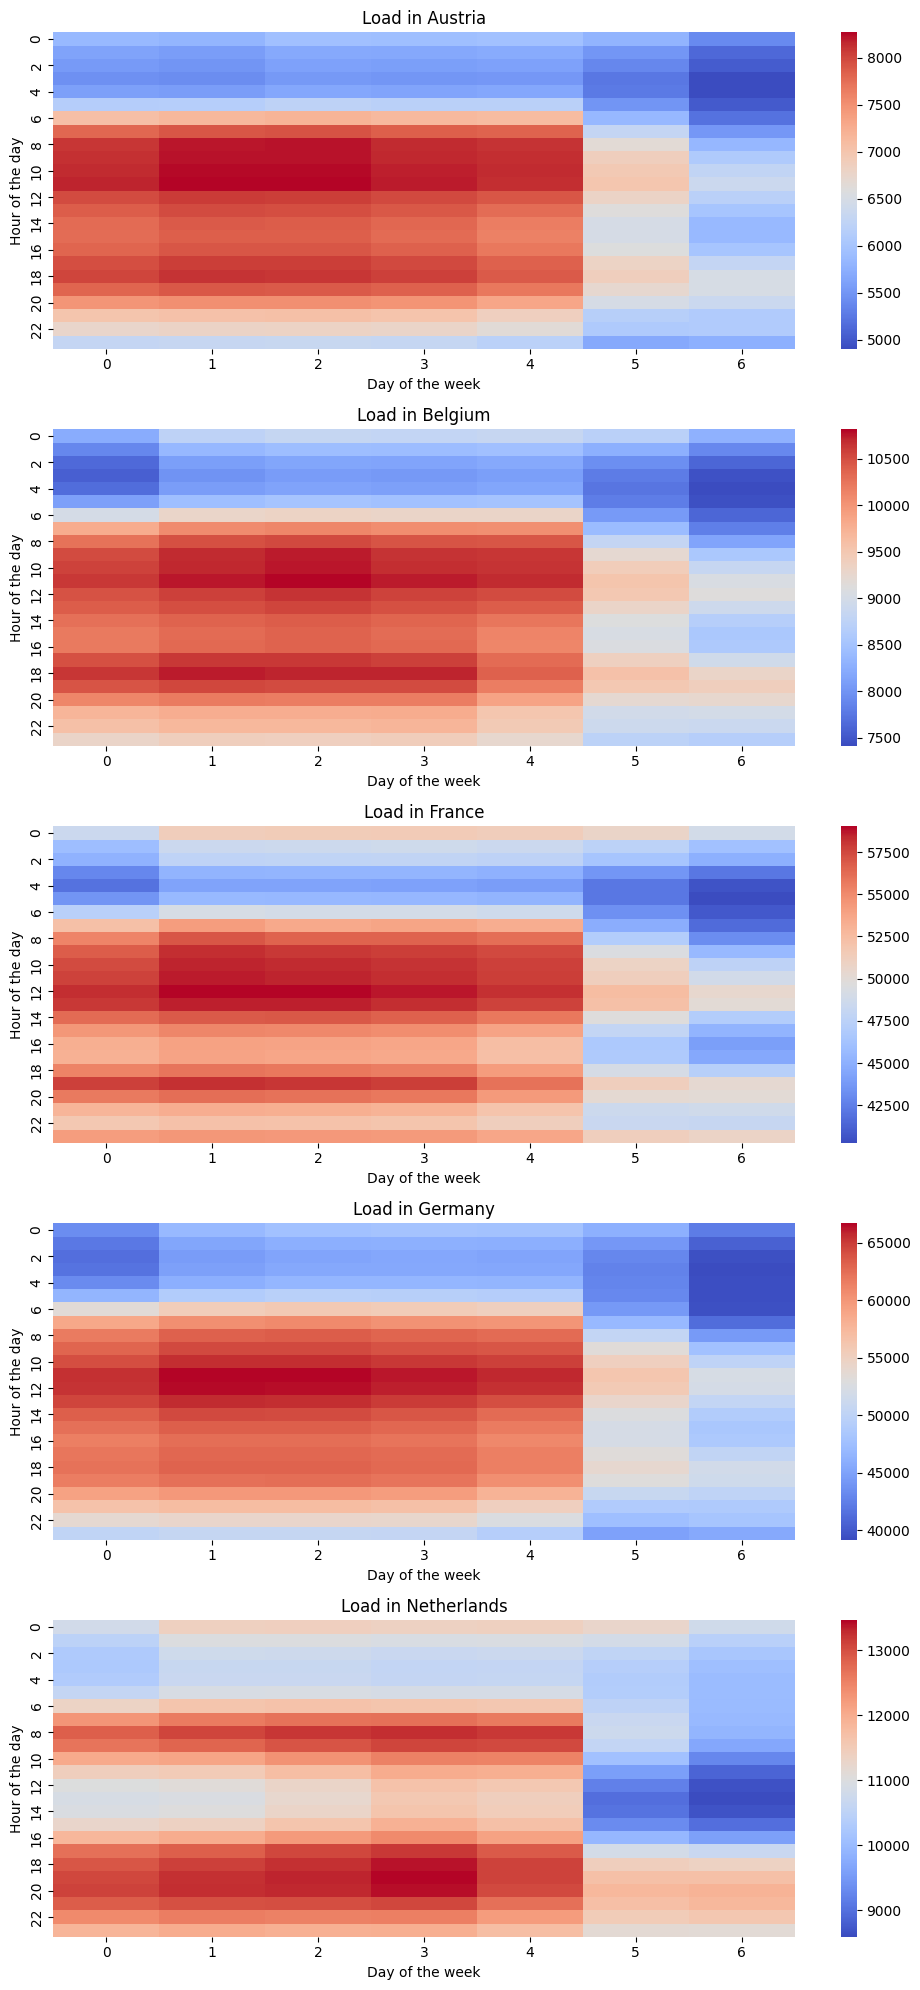

In [36]:
# Heatmap of Hourly Load of all:
load['hour'] = load['date'].dt.hour
load['day'] = load['date'].dt.dayofweek
load['month'] = load['date'].dt.month
load['year'] = load['date'].dt.year

load_pivot1 = load.pivot_table(index='hour', columns='day', values='load_AT', aggfunc='mean')
load_pivot2 = load.pivot_table(index='hour', columns='day', values='load_BE', aggfunc='mean')
load_pivot3= load.pivot_table(index='hour', columns='day', values='load_FRA', aggfunc='mean')
load_pivot4 = load.pivot_table(index='hour', columns='day', values='load_GER', aggfunc='mean')
load_pivot5 = load.pivot_table(index='hour', columns='day', values='load_NL', aggfunc='mean')

fig, ax = plt.subplots(5, 1, figsize=(10, 20))

sns.heatmap(load_pivot1, ax=ax[0], cmap='coolwarm')
ax[0].set_title('Load in Austria')
ax[0].set_xlabel('Day of the week')
ax[0].set_ylabel('Hour of the day')

sns.heatmap(load_pivot2, ax=ax[1], cmap='coolwarm')
ax[1].set_title('Load in Belgium')
ax[1].set_xlabel('Day of the week')
ax[1].set_ylabel('Hour of the day')

sns.heatmap(load_pivot3, ax=ax[2], cmap='coolwarm')
ax[2].set_title('Load in France')
ax[2].set_xlabel('Day of the week')
ax[2].set_ylabel('Hour of the day')

sns.heatmap(load_pivot4, ax=ax[3], cmap='coolwarm')
ax[3].set_title('Load in Germany')
ax[3].set_xlabel('Day of the week')
ax[3].set_ylabel('Hour of the day')

sns.heatmap(load_pivot5, ax=ax[4], cmap='coolwarm')
ax[4].set_title('Load in Netherlands')
ax[4].set_xlabel('Day of the week')
ax[4].set_ylabel('Hour of the day')

plt.tight_layout()
plt.show()

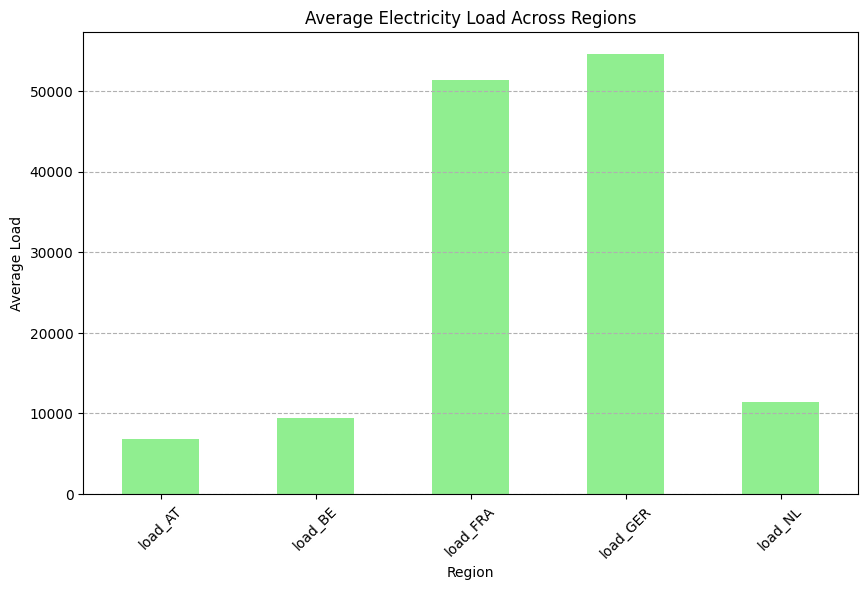

In [37]:
average_load = load[['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL']].mean()
average_load_plot = average_load.plot(kind='bar', figsize=(10, 6), color='lightgreen')

plt.title('Average Electricity Load Across Regions')
plt.xlabel('Region')
plt.ylabel('Average Load')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()



In [38]:
load

date  load_AT  load_BE  load_FRA  load_GER   load_NL  \
0     2019-01-01 00:00:00   5949.0  8993.50     63450  43213.25  12390.75   
1     2019-01-01 01:00:00   5641.0  8561.75     60800  41275.75  11810.00   
2     2019-01-01 02:00:00   5511.0  8180.25     59950  40187.50  11410.50   
3     2019-01-01 03:00:00   5343.0  7869.25     56400  39909.00  11309.00   
4     2019-01-01 04:00:00   5383.0  7664.50     53550  40258.00  11420.25   
...                   ...      ...      ...       ...       ...       ...   
43814 2023-12-31 19:00:00   6465.0  9560.00     53150  52153.75  12407.00   
43815 2023-12-31 20:00:00   6165.0  9219.00     51850  49840.25  12096.25   
43816 2023-12-31 21:00:00   5833.0  8922.00     50350  47258.00  11699.50   
43817 2023-12-31 22:00:00   5868.0  8862.25     51250  44319.25  11366.25   
43818 2023-12-31 23:00:00   5608.0  8732.75     53250  42350.25  11020.50   

       hour  day  month  year  
0         0    1      1  2019  
1         1    1      1  2019  
2         2    1      1  2019  
3         3    1      1  2019  
4         4    1      1  2019  
...     ...  ...    ...   ...  
43814    19    6     12  2023  
43815    20    6     12  2023  
43816    21    6     12  2023  
43817    22    6     12  2023  
43818    23    6     12  2023  

[43819 rows x 10 columns]

c:\Users\janle\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


OptionError: No such keys(s): 'mode.use_inf_as_null'

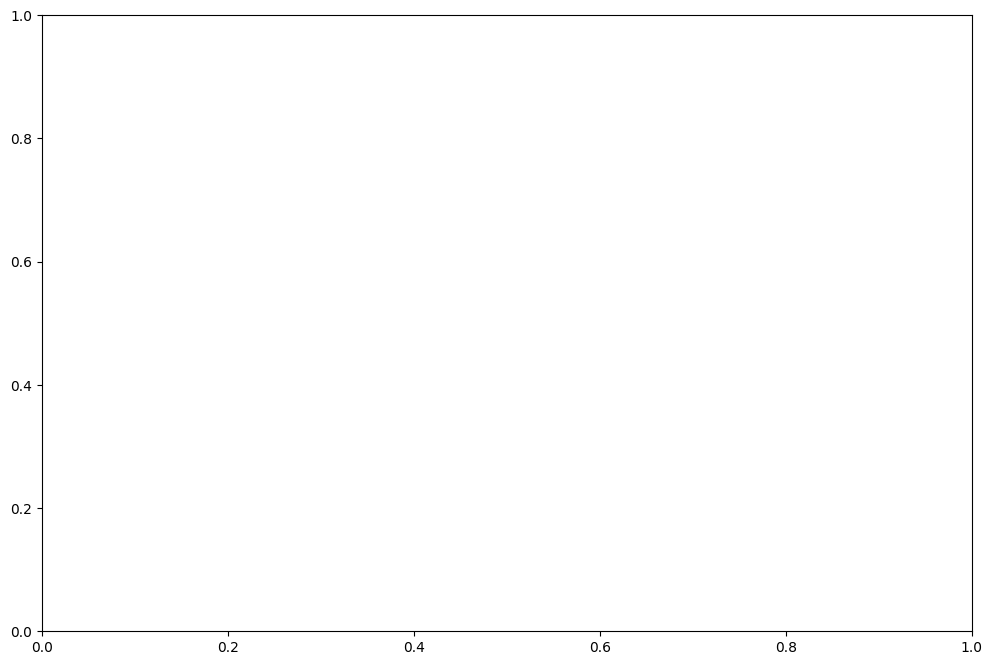

In [39]:
plt.figure(figsize=(12, 8))

for column in ['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL']:
    sns.kdeplot(load[column], label=column)

plt.title('Distribution of Electricity Load Across Regions')
plt.xlabel('Load')
plt.ylabel('Density')
plt.legend(title='Region')

plt.show()

c:\Users\janle\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\janle\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


OptionError: No such keys(s): 'mode.use_inf_as_null'

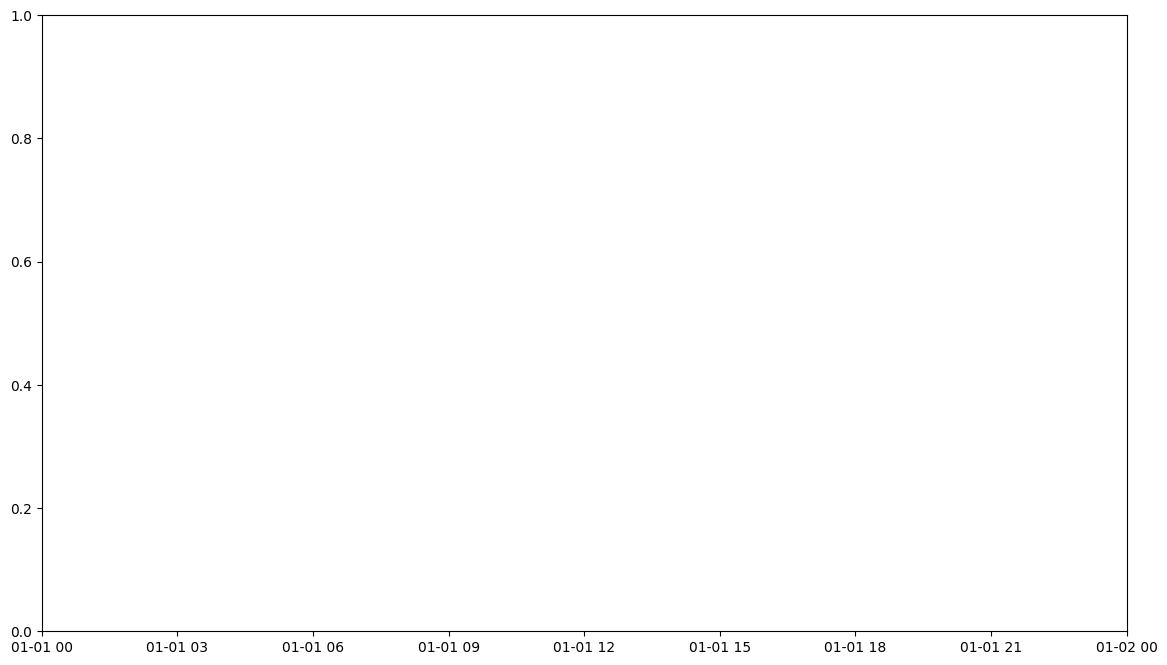

In [ ]:

plt.figure(figsize=(14, 8))

for column in ['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL']:
    # We'll plot a sample of the data to keep the plot legible and focused
    sampled_data = load.loc[::24*7, ['date', column]]  # Weekly sampling for clarity
    sns.lineplot(x='date', y=column, data=sampled_data, label=column)

plt.title('Weekly Sampled Electricity Load Across Regions (2019-2023)')
plt.xlabel('Date')
plt.ylabel('Electricity Load')
plt.legend(title='Region')

plt.show()

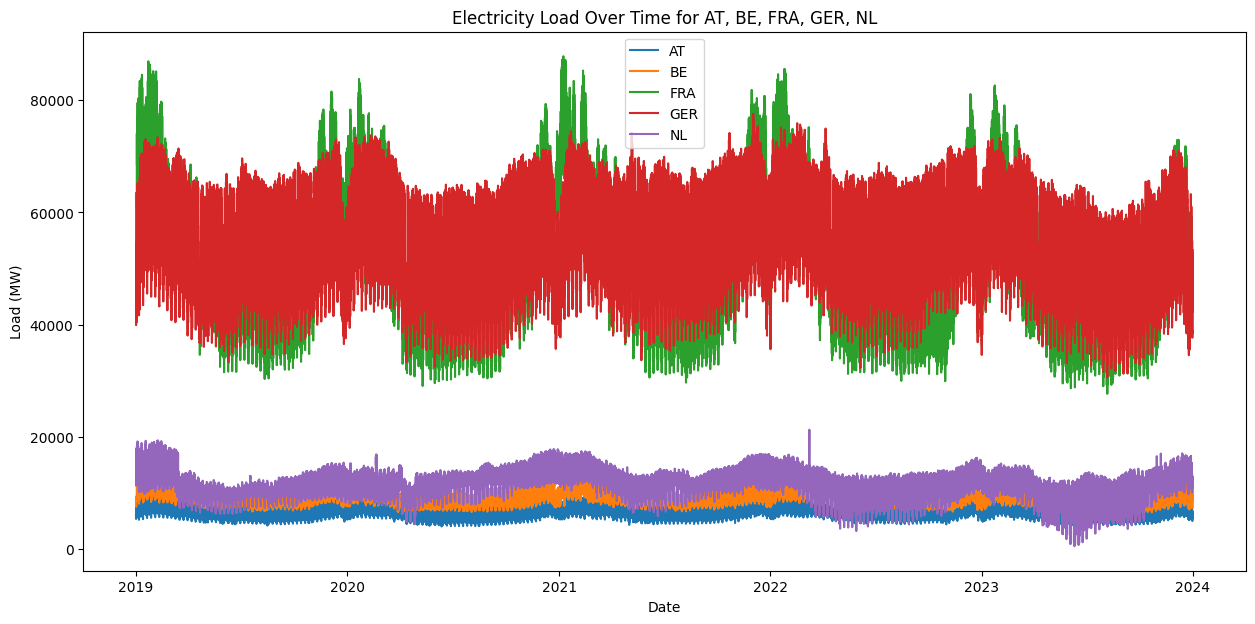

In [40]:
plt.figure(figsize=(15, 7))
for country_code in ['AT', 'BE', 'FRA', 'GER', 'NL']:
    plt.plot(load['date'], load[f'load_{country_code}'], label=f'{country_code}')

plt.title('Electricity Load Over Time for AT, BE, FRA, GER, NL')
plt.xlabel('Date')
plt.ylabel('Load (MW)')
plt.legend()
plt.show()

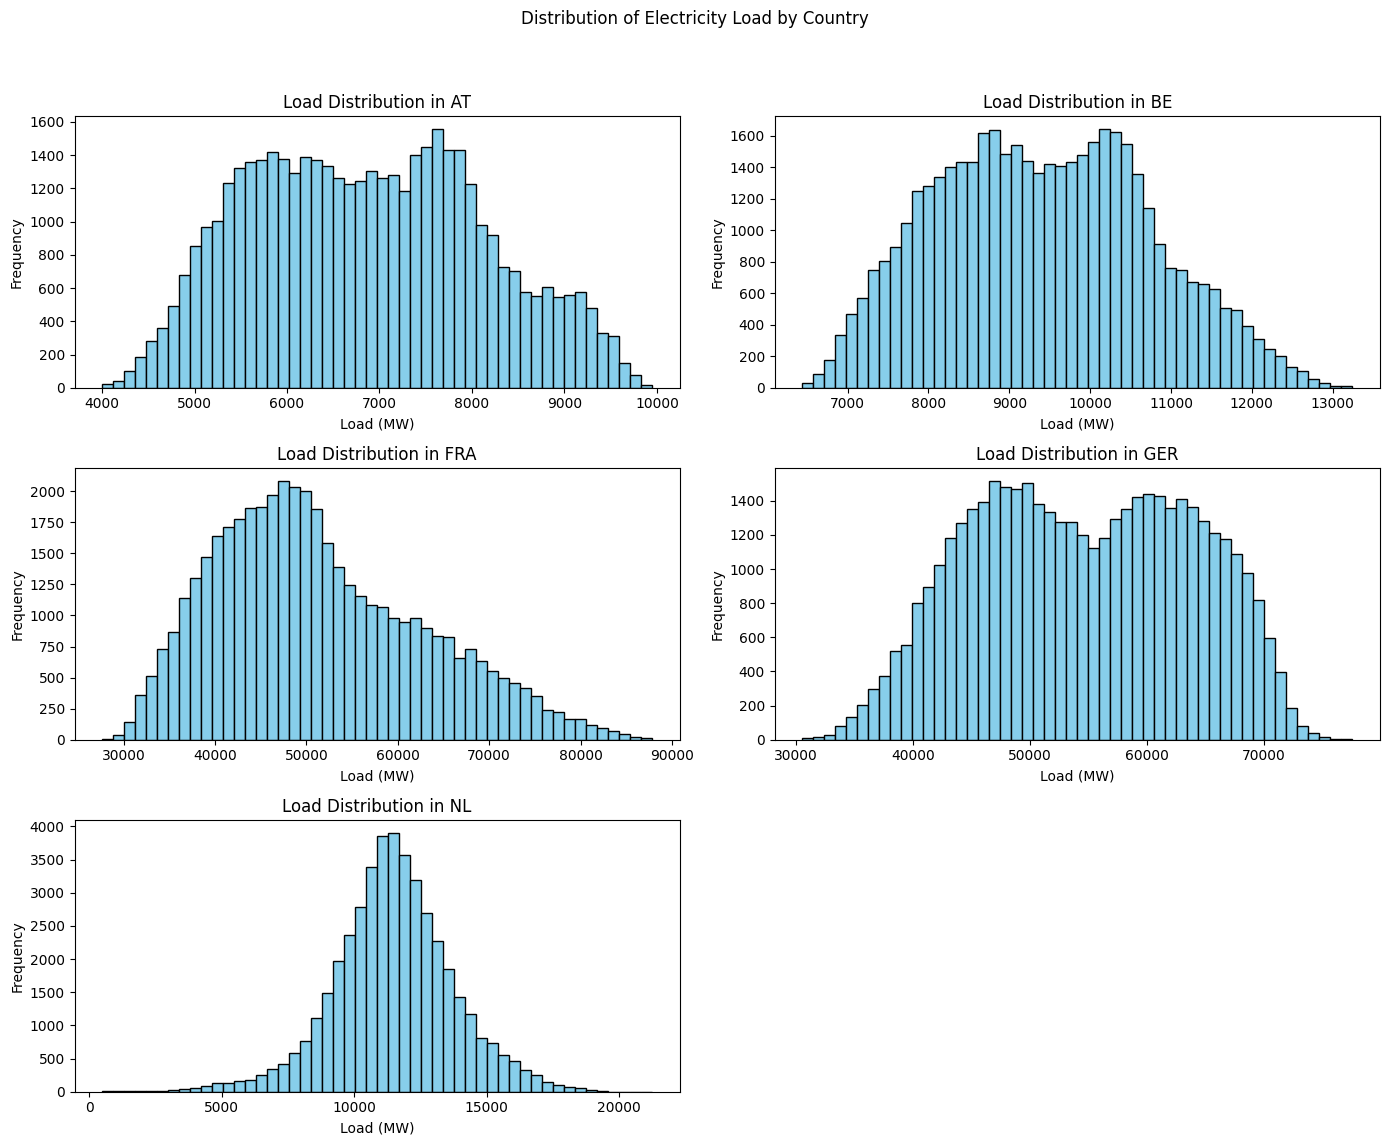

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle('Distribution of Electricity Load by Country')

axes = axes.flatten()

for i, country_code in enumerate(['AT', 'BE', 'FRA', 'GER', 'NL']):
    axes[i].hist(load[f'load_{country_code}'], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Load Distribution in {country_code}')
    axes[i].set_xlabel('Load (MW)')
    axes[i].set_ylabel('Frequency')

axes[-1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

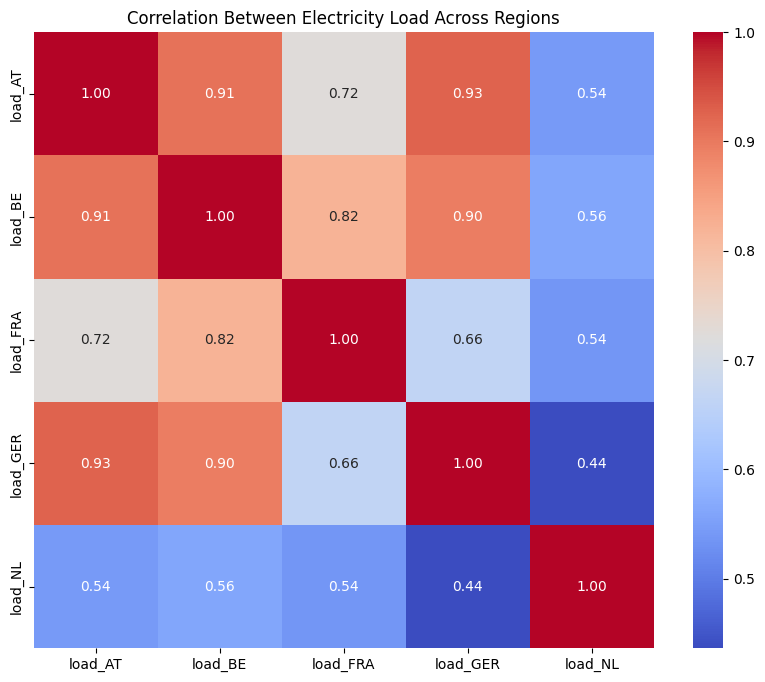

In [42]:

load_corr = load[['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(load_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Electricity Load Across Regions')
plt.show()

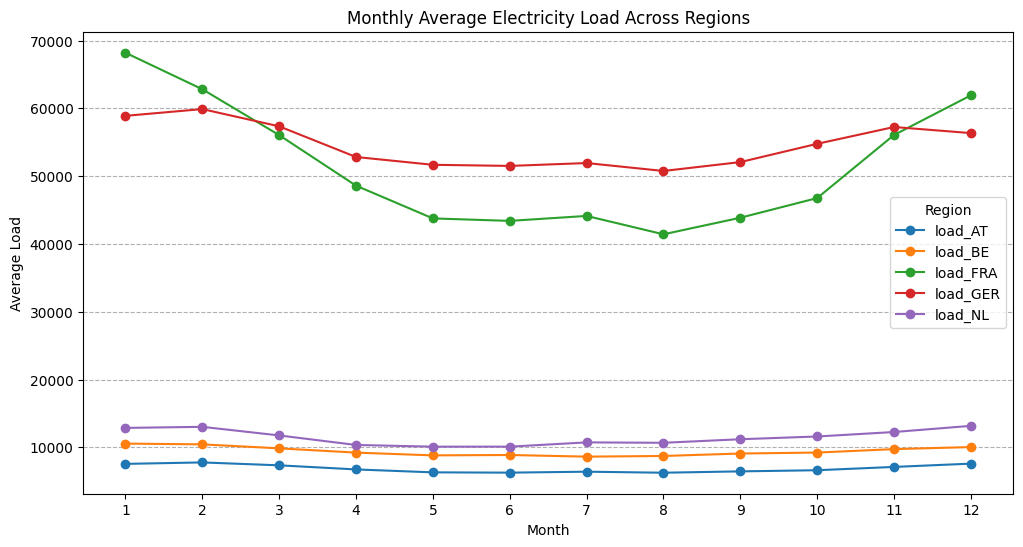

In [43]:
# Plotting the monthly average load for each region to identify seasonal patterns
load['month'] = load['date'].dt.month
monthly_avg_load = load.groupby('month')[['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL']].mean()

plt.figure(figsize=(12, 6))
for column in monthly_avg_load.columns:
    plt.plot(monthly_avg_load.index, monthly_avg_load[column], marker='o', label=column)

plt.title('Monthly Average Electricity Load Across Regions')
plt.xlabel('Month')
plt.ylabel('Average Load')
plt.xticks(monthly_avg_load.index)
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--')


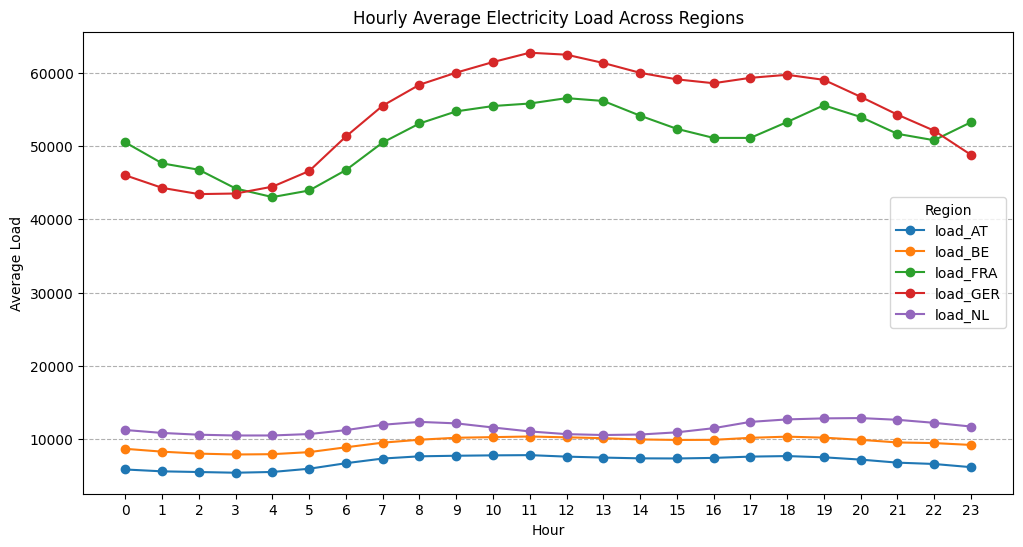

In [44]:
# Daily Load Patterns - Average load for each hour of the day
load['hour'] = load['date'].dt.hour
hourly_avg_load = load.groupby('hour')[['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL']].mean()

plt.figure(figsize=(12, 6))
for column in hourly_avg_load.columns:
    plt.plot(hourly_avg_load.index, hourly_avg_load[column], marker='o', label=column)

plt.title('Hourly Average Electricity Load Across Regions')
plt.xlabel('Hour')
plt.ylabel('Average Load')
plt.xticks(hourly_avg_load.index)
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--')

plt.show()


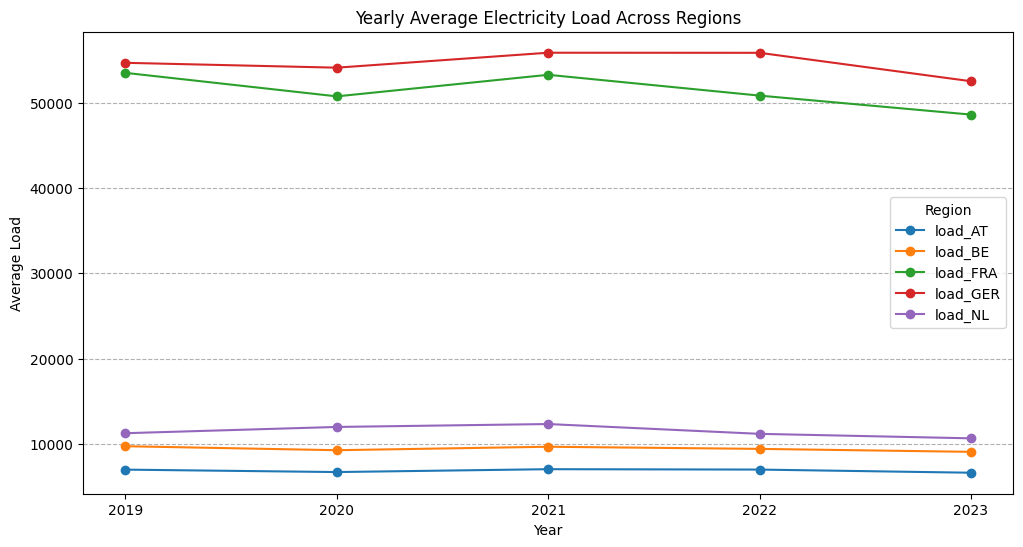

In [45]:
# Yearly Load Trend - Average load for each year
load['year'] = load['date'].dt.year
yearly_avg_load = load.groupby('year')[['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL']].mean()

plt.figure(figsize=(12, 6))
for column in yearly_avg_load.columns:
    plt.plot(yearly_avg_load.index, yearly_avg_load[column], marker='o', label=column)

plt.title('Yearly Average Electricity Load Across Regions')
plt.xlabel('Year')
plt.ylabel('Average Load')
plt.xticks(yearly_avg_load.index)
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--')

plt.show()


## PRICES

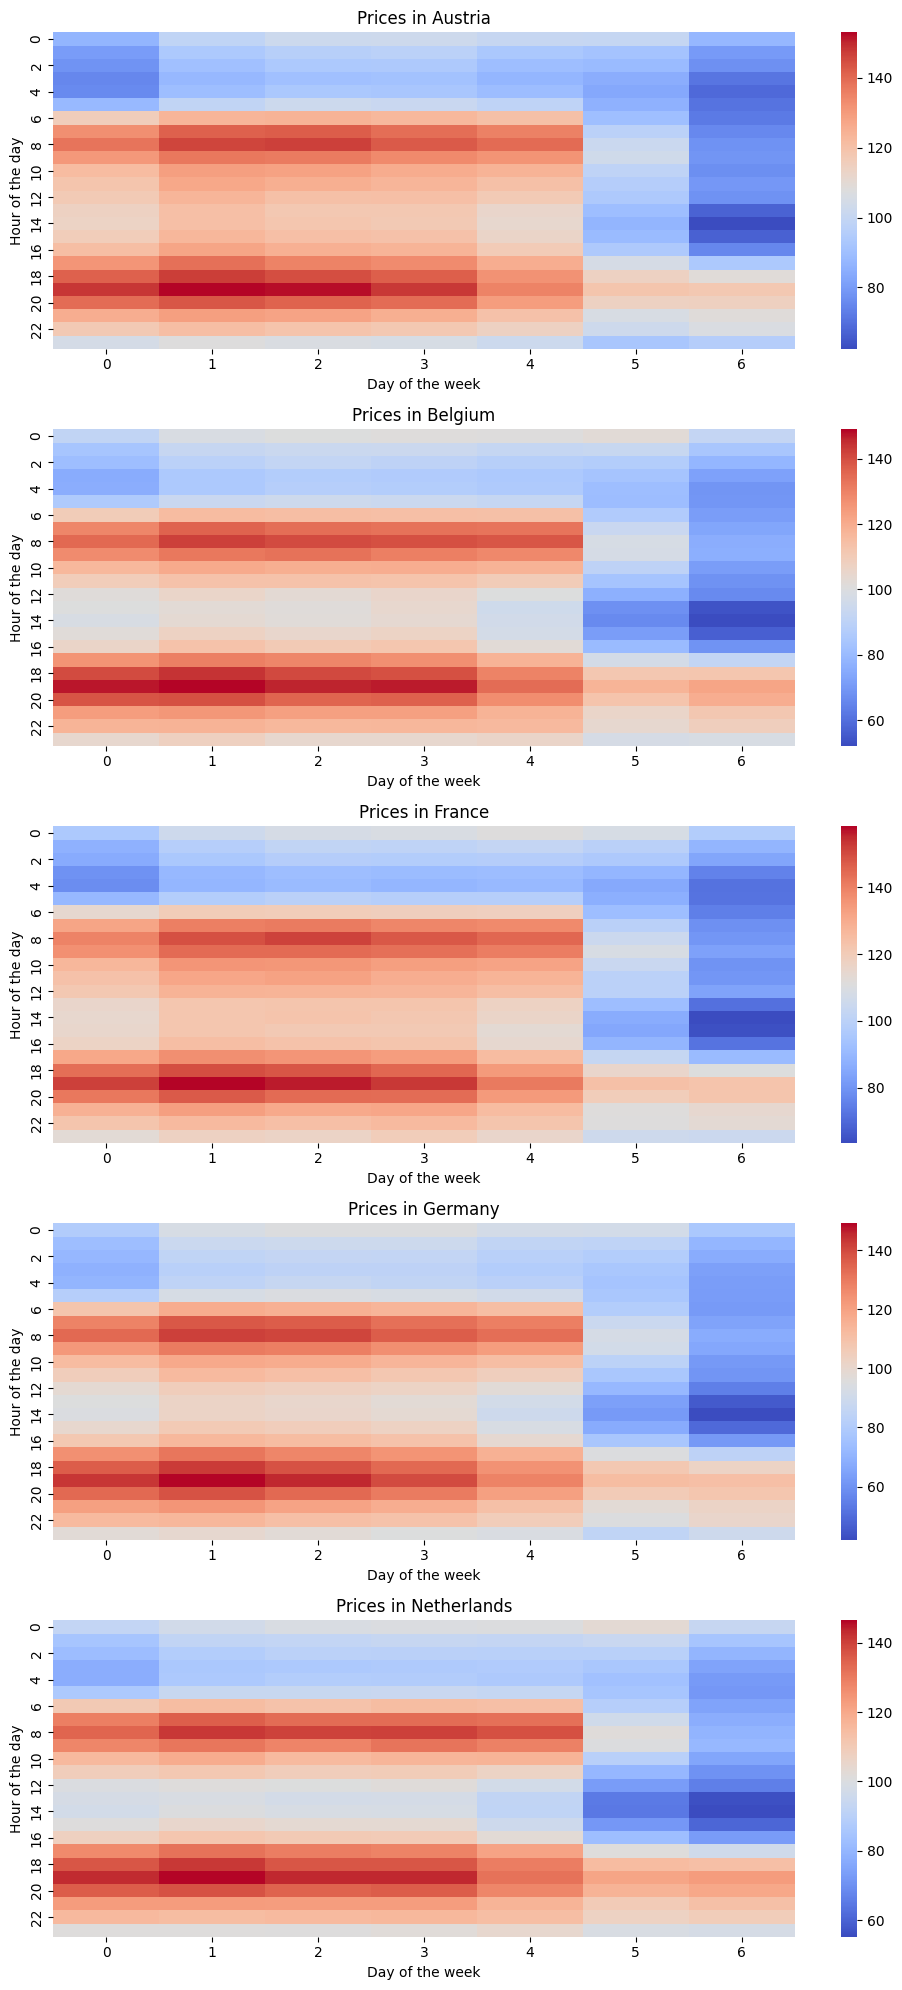

In [46]:
# Heatmap of Hourly Prices:
prices['hour'] = prices['date'].dt.hour
prices['day'] = prices['date'].dt.dayofweek
prices['month'] = prices['date'].dt.month
prices['year'] = prices['date'].dt.year

prices_pivot1 = prices.pivot_table(index='hour', columns='day', values='price_AT', aggfunc='mean')
prices_pivot2 = prices.pivot_table(index='hour', columns='day', values='price_BE', aggfunc='mean')
prices_pivot3 = prices.pivot_table(index='hour', columns='day', values='price_FRA', aggfunc='mean')
prices_pivot4 = prices.pivot_table(index='hour', columns='day', values='price_GER', aggfunc='mean')
prices_pivot5 = prices.pivot_table(index='hour', columns='day', values='price_NL', aggfunc='mean')

fig, ax = plt.subplots(5, 1, figsize=(10, 20))

sns.heatmap(prices_pivot1, ax=ax[0], cmap='coolwarm')
ax[0].set_title('Prices in Austria')
ax[0].set_xlabel('Day of the week')
ax[0].set_ylabel('Hour of the day')

sns.heatmap(prices_pivot2, ax=ax[1], cmap='coolwarm')
ax[1].set_title('Prices in Belgium')
ax[1].set_xlabel('Day of the week')
ax[1].set_ylabel('Hour of the day')

sns.heatmap(prices_pivot3, ax=ax[2], cmap='coolwarm')
ax[2].set_title('Prices in France')
ax[2].set_xlabel('Day of the week')
ax[2].set_ylabel('Hour of the day')

sns.heatmap(prices_pivot4, ax=ax[3], cmap='coolwarm')
ax[3].set_title('Prices in Germany')
ax[3].set_xlabel('Day of the week')
ax[3].set_ylabel('Hour of the day')

sns.heatmap(prices_pivot5, ax=ax[4], cmap='coolwarm')
ax[4].set_title('Prices in Netherlands')
ax[4].set_xlabel('Day of the week')
ax[4].set_ylabel('Hour of the day')

plt.tight_layout()
plt.show()





c:\Users\janle\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\janle\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


OptionError: No such keys(s): 'mode.use_inf_as_null'

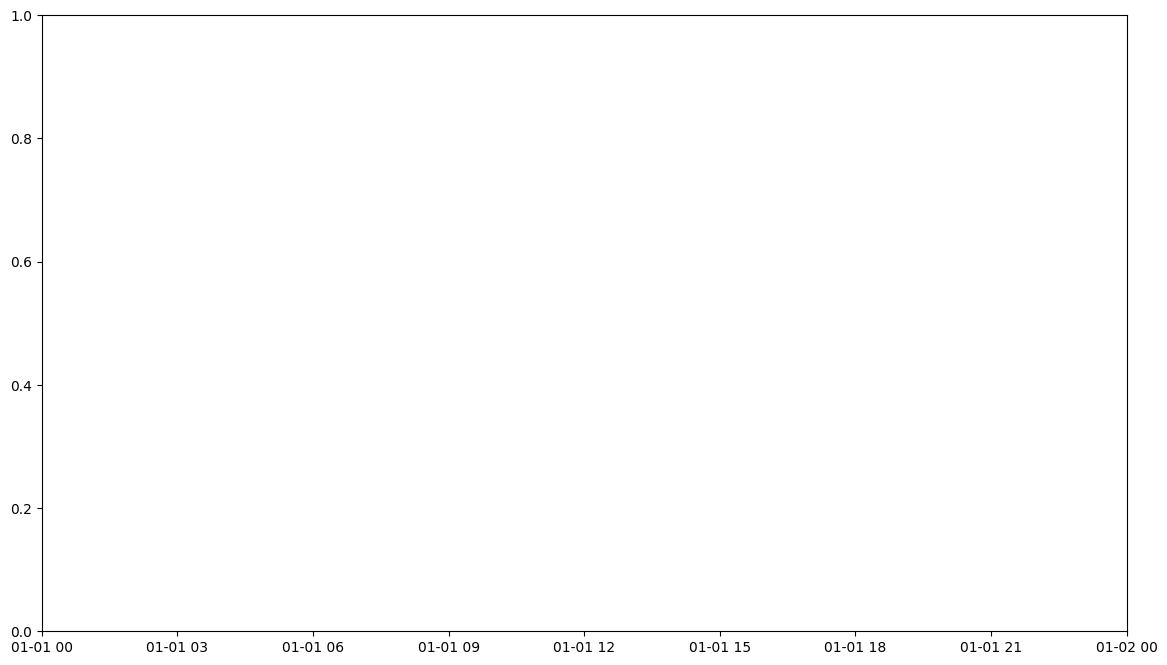

In [47]:
plt.figure(figsize=(14, 8))

for column in ['price_AT', 'price_BE', 'price_FRA', 'price_GER', 'price_NL']:
    # We'll plot a sample of the data to keep the plot legible and focused
    sampled_data = prices.loc[::24*7, ['date', column]]  # Weekly sampling for clarity
    sns.lineplot(x='date', y=column, data=sampled_data, label=column)

plt.title('Weekly Sampled Electricity Prices Across Regions (2019-2023)')
plt.xlabel('Date')
plt.ylabel('Electricity Price')
plt.legend(title='Region')

plt.show()

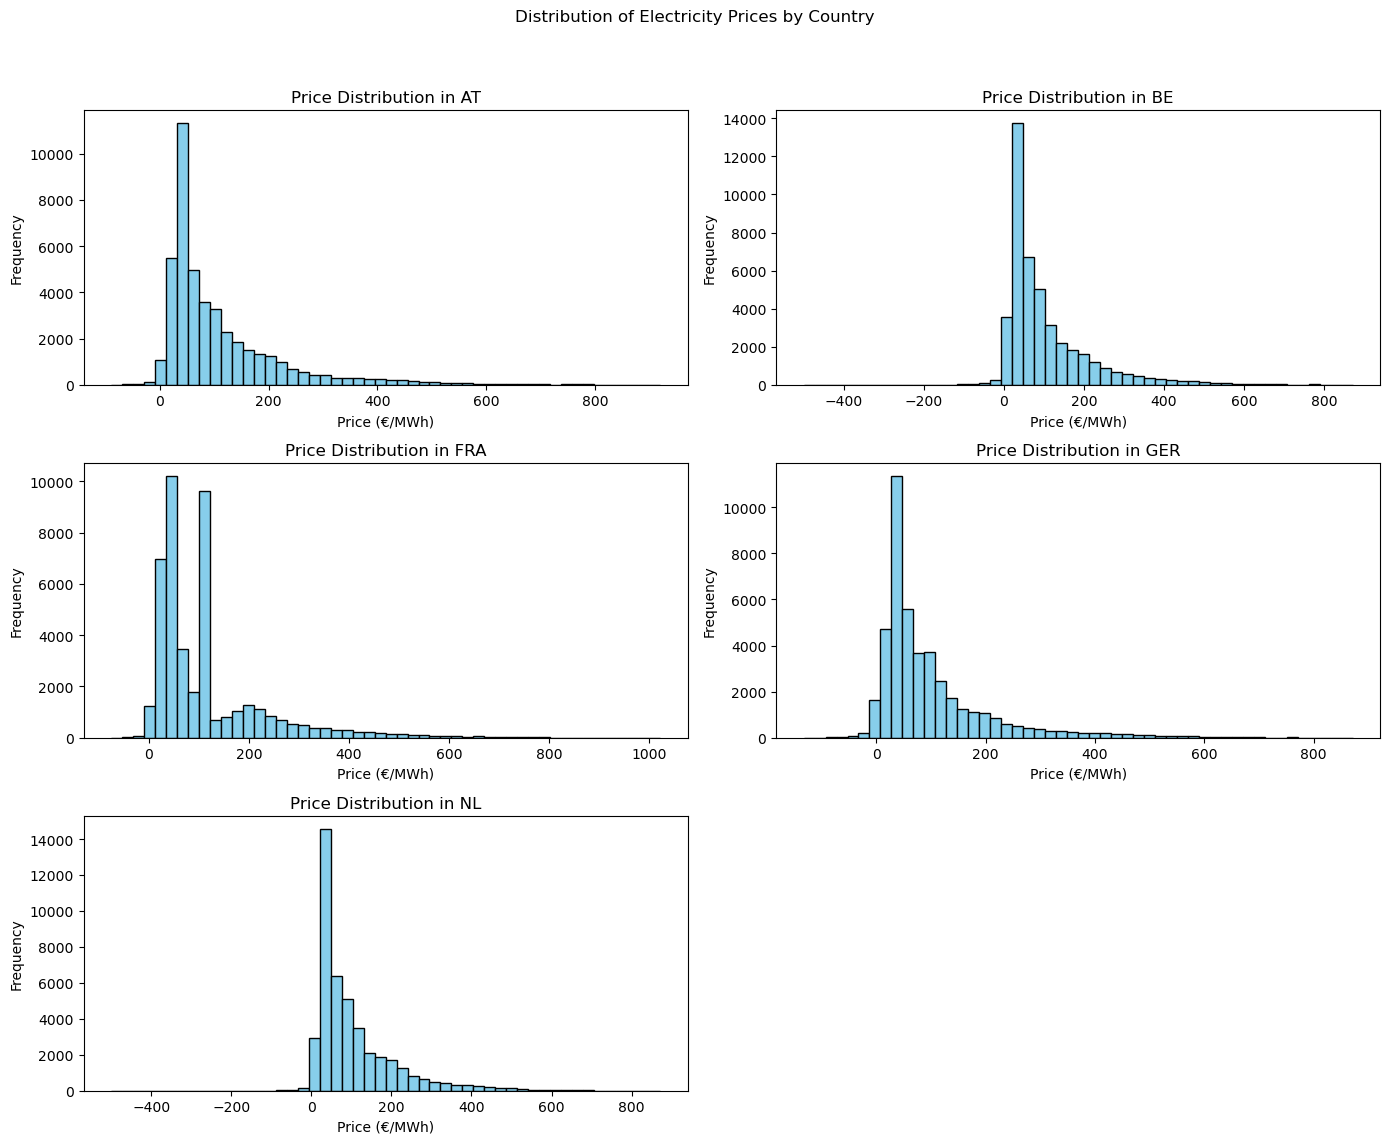

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.suptitle('Distribution of Electricity Prices by Country')

axes = axes.flatten()

for i, country_code in enumerate(['AT', 'BE', 'FRA', 'GER', 'NL']):
    axes[i].hist(prices[f'price_{country_code}'], bins=50, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Price Distribution in {country_code}')
    axes[i].set_xlabel('Price (€/MWh)')
    axes[i].set_ylabel('Frequency')

axes[-1].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

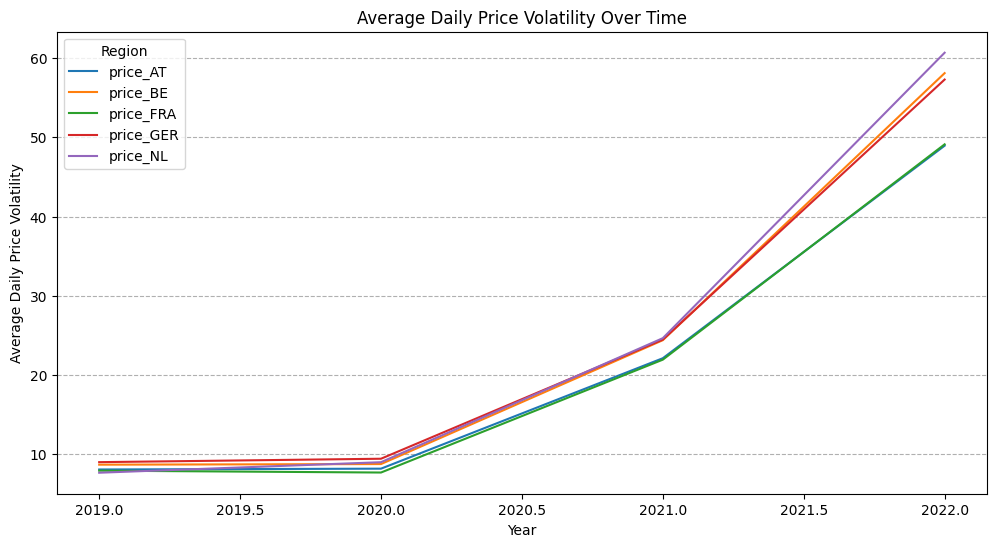

In [48]:
# Price Volatility Over Time
prices['day'] = prices['date'].dt.day
daily_std_prices = prices.groupby(['year', 'month', 'day'])[['price_AT', 'price_BE', 'price_FRA', 'price_GER', 'price_NL']].std()

plt.figure(figsize=(12, 6))
daily_std_prices.groupby('year').mean().plot(kind='line', ax=plt.gca())
plt.title('Average Daily Price Volatility Over Time')
plt.xlabel('Year')
plt.ylabel('Average Daily Price Volatility')
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--')

plt.show()


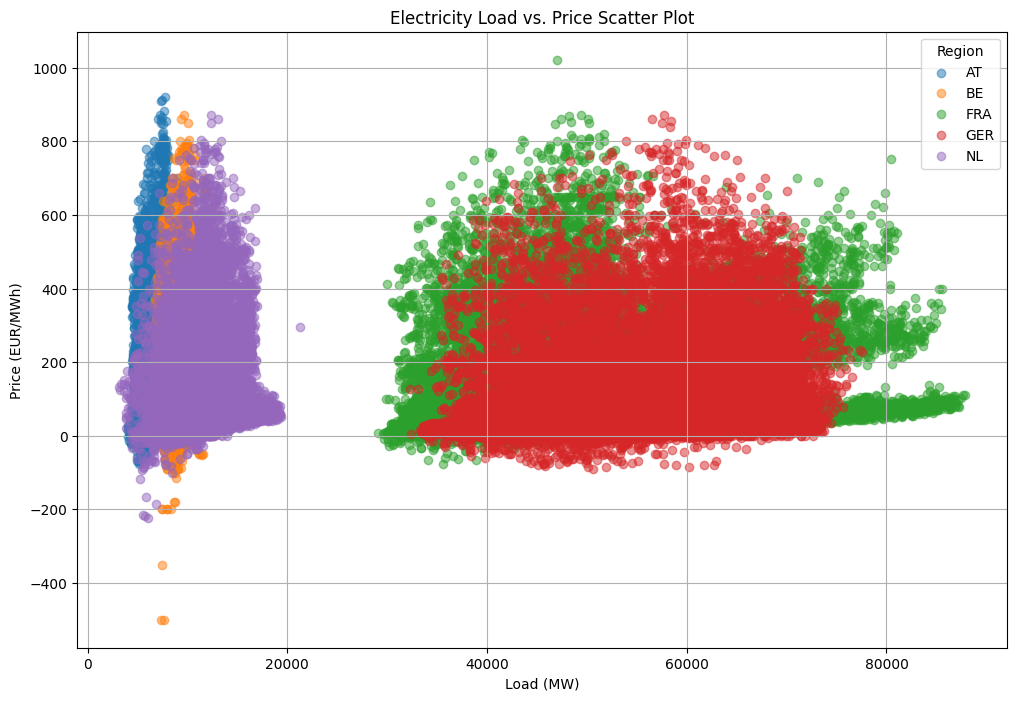

In [49]:
# Price vs. Load Scatter Plot
load_prices = pd.merge(load, prices, on='date', suffixes=('_load', '_price'))

plt.figure(figsize=(12, 8))
for region in ['AT', 'BE', 'FRA', 'GER', 'NL']:
    plt.scatter(load_prices[f'load_{region}'], load_prices[f'price_{region}'], alpha=0.5, label=region)

plt.title('Electricity Load vs. Price Scatter Plot')
plt.xlabel('Load (MW)')
plt.ylabel('Price (EUR/MWh)')
plt.legend(title='Region')
plt.grid(True)

plt.show()


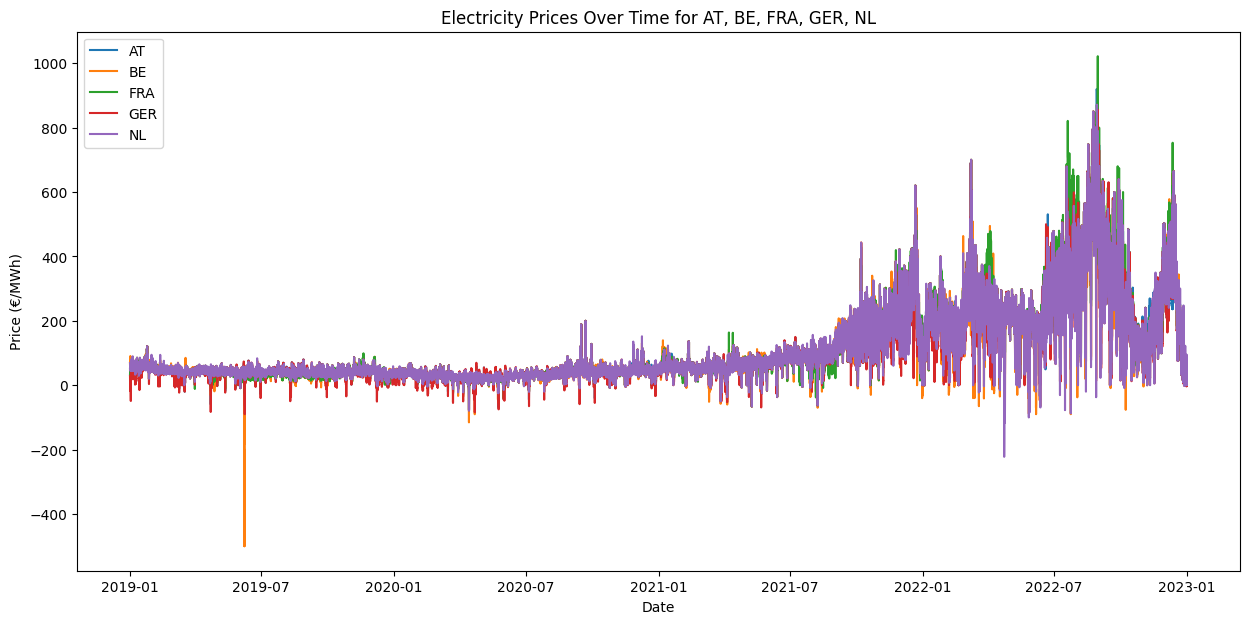

In [50]:
plt.figure(figsize=(15, 7))

for country_code in ['AT', 'BE', 'FRA', 'GER', 'NL']:
    plt.plot(prices['date'], prices[f'price_{country_code}'], label=f'{country_code}')

plt.title('Electricity Prices Over Time for AT, BE, FRA, GER, NL')
plt.xlabel('Date')
plt.ylabel('Price (€/MWh)')
plt.legend()
plt.show()


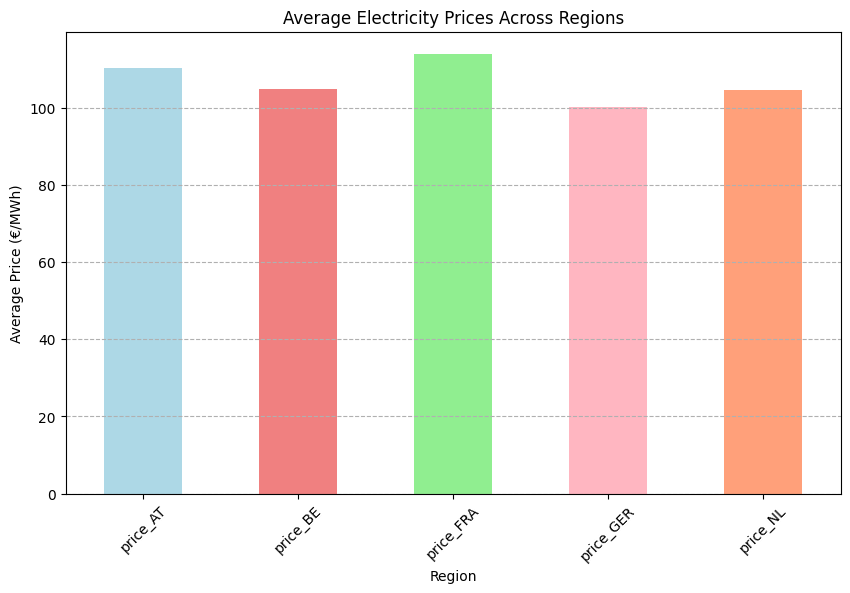

In [51]:
average_prices = prices[['price_AT', 'price_BE', 'price_FRA', 'price_GER', 'price_NL']].mean(skipna=True)
average_prices_plot = average_prices.plot(kind='bar', figsize=(10, 6), color=['lightblue', 'lightcoral', 'lightgreen', 'lightpink', 'lightsalmon'])

plt.title('Average Electricity Prices Across Regions')
plt.xlabel('Region')
plt.ylabel('Average Price (€/MWh)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')

plt.show()

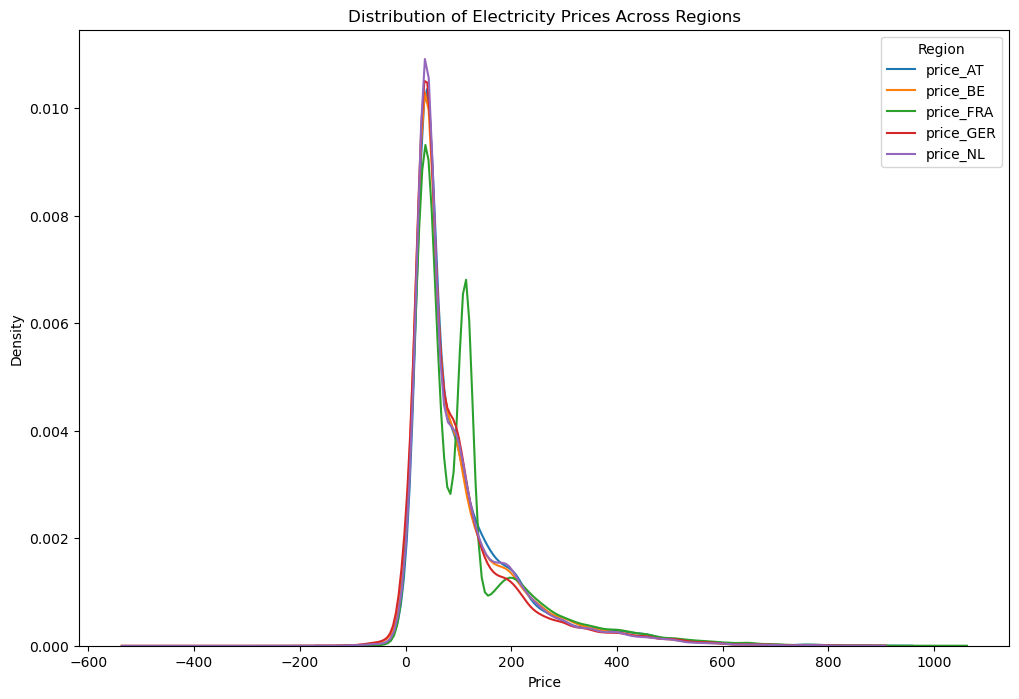

In [ ]:
plt.figure(figsize=(12, 8))

for column in ['price_AT', 'price_BE', 'price_FRA', 'price_GER', 'price_NL']:
    sns.kdeplot(prices[column], label=column)


plt.title('Distribution of Electricity Prices Across Regions')
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend(title='Region')

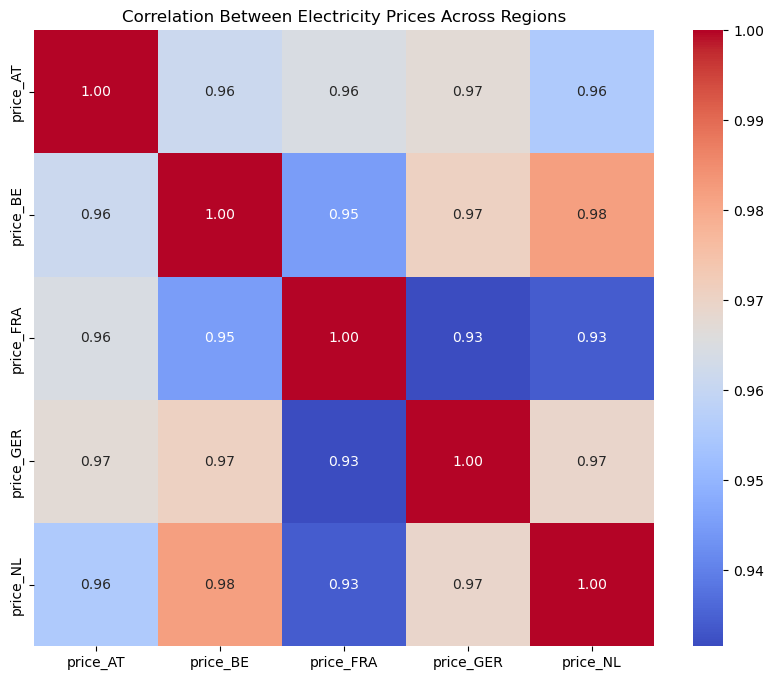

In [ ]:
prices_corr = prices[['price_AT', 'price_BE', 'price_FRA', 'price_GER', 'price_NL']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(prices_corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Between Electricity Prices Across Regions')
plt.show()


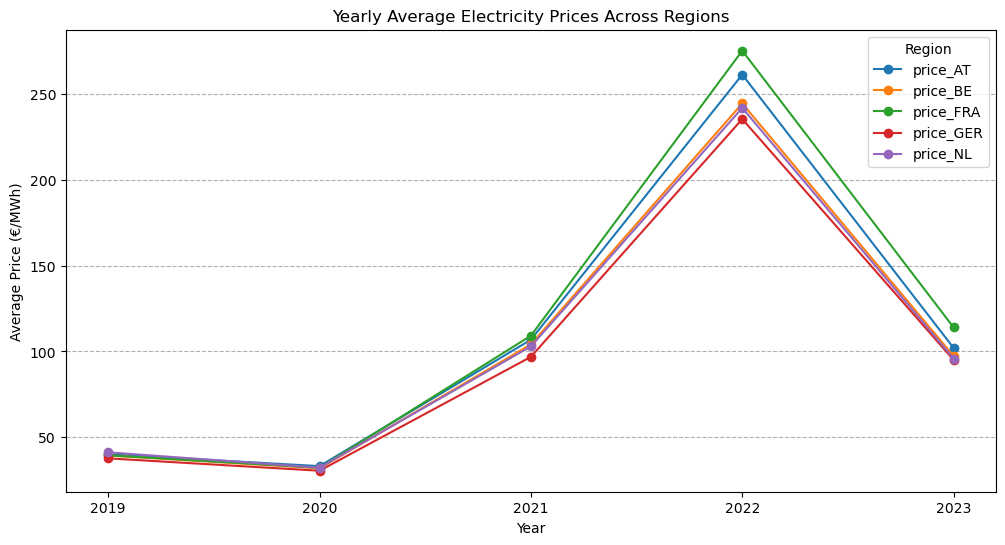

In [ ]:
# a Yearly Average Price plot for each country to see the trends over the years.

prices['year'] = prices['date'].dt.year

yearly_avg_prices = prices.groupby('year')[['price_AT', 'price_BE', 'price_FRA', 'price_GER', 'price_NL']].mean()

plt.figure(figsize=(12, 6))
for column in yearly_avg_prices.columns:
    plt.plot(yearly_avg_prices.index, yearly_avg_prices[column], marker='o', label=column)

plt.title('Yearly Average Electricity Prices Across Regions')
plt.xlabel('Year')
plt.ylabel('Average Price (€/MWh)')
plt.xticks(yearly_avg_prices.index)
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--')

plt.show()



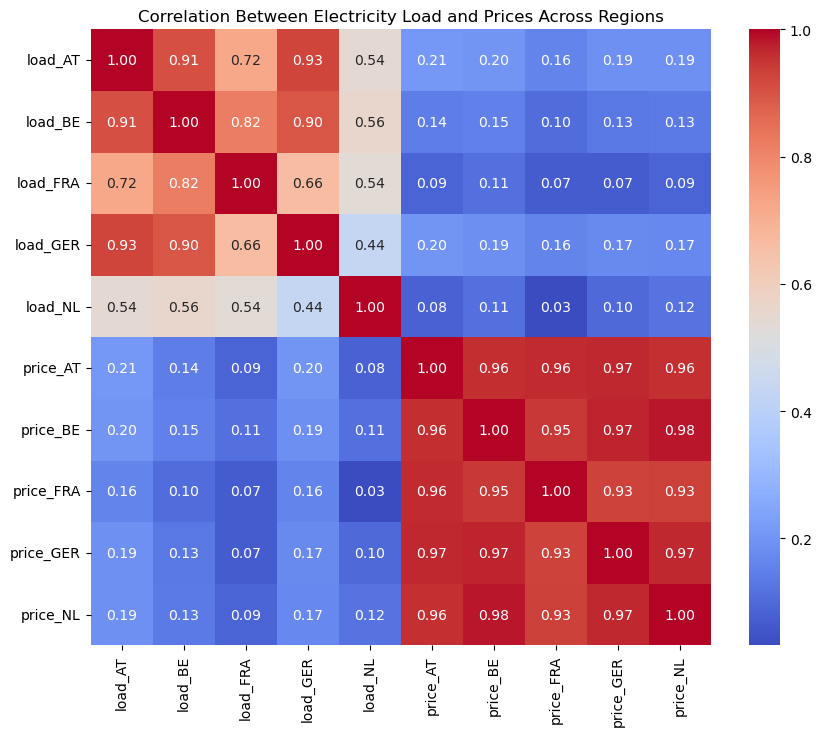

In [ ]:
# Correlation Heatmap Between Load and Price
load_prices_corr = load_prices[['load_AT', 'load_BE', 'load_FRA', 'load_GER', 'load_NL',
                                'price_AT', 'price_BE', 'price_FRA', 'price_GER', 'price_NL']].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(load_prices_corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Between Electricity Load and Prices Across Regions')
plt.show()


## RES_GEN

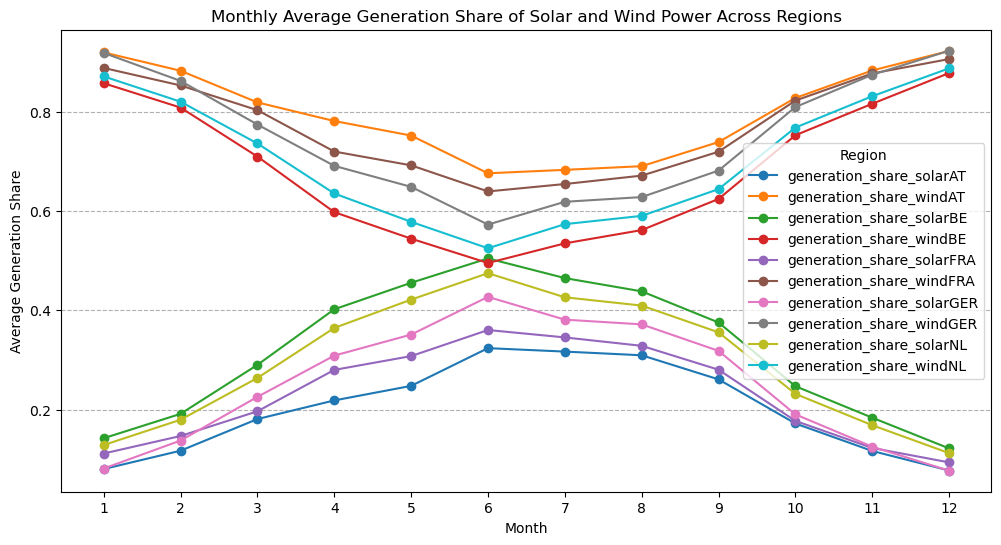

In [ ]:
# Renewable vs. Total Generation: For each region
res_gen['year'] = res_gen['date'].dt.year
res_gen['month'] = res_gen['date'].dt.month
# you should calculate the generation share of solar and wind power in each region
res_gen['generation_totalAT'] = res_gen['solar_forecastAT'] + res_gen['windonshore_forecastAT'] 
res_gen['generation_totalBE'] = res_gen['solar_forecastBE'] + res_gen['windonshore_forecastBE']
res_gen['generation_totalFRA'] = res_gen['solar_forecastFRA'] + res_gen['windonshore_forecastFRA']
res_gen['generation_totalGER'] = res_gen['solar_forecastGER'] + res_gen['windonshore_forecastGER']
res_gen['generation_totalNL'] = res_gen['solar_forecastNL'] + res_gen['windonshore_forecastNL']

res_gen['generation_share_solarAT'] = res_gen['solar_forecastAT'] / res_gen['generation_totalAT']
res_gen['generation_share_solarBE'] = res_gen['solar_forecastBE'] / res_gen['generation_totalBE']
res_gen['generation_share_solarFRA'] = res_gen['solar_forecastFRA'] / res_gen['generation_totalFRA']
res_gen['generation_share_solarGER'] = res_gen['solar_forecastGER'] / res_gen['generation_totalGER']
res_gen['generation_share_solarNL'] = res_gen['solar_forecastNL'] / res_gen['generation_totalNL']

res_gen['generation_share_windAT'] = res_gen['windonshore_forecastAT'] / res_gen['generation_totalAT']
res_gen['generation_share_windBE'] = res_gen['windonshore_forecastBE'] / res_gen['generation_totalBE']
res_gen['generation_share_windFRA'] = res_gen['windonshore_forecastFRA'] / res_gen['generation_totalFRA']
res_gen['generation_share_windGER'] = res_gen['windonshore_forecastGER'] / res_gen['generation_totalGER']
res_gen['generation_share_windNL'] = res_gen['windonshore_forecastNL'] / res_gen['generation_totalNL']

# Plotting the monthly average generation share of solar and wind power for each region
monthly_avg_generation_share = res_gen.groupby('month')[['generation_share_solarAT', 'generation_share_windAT',
                                                         'generation_share_solarBE', 'generation_share_windBE',
                                                         'generation_share_solarFRA', 'generation_share_windFRA',
                                                         'generation_share_solarGER', 'generation_share_windGER',
                                                         'generation_share_solarNL', 'generation_share_windNL']].mean()

plt.figure(figsize=(12, 6))
for column in monthly_avg_generation_share.columns:
    plt.plot(monthly_avg_generation_share.index, monthly_avg_generation_share[column], marker='o', label=column)

plt.title('Monthly Average Generation Share of Solar and Wind Power Across Regions')
plt.xlabel('Month')
plt.ylabel('Average Generation Share')
plt.xticks(monthly_avg_generation_share.index)
plt.legend(title='Region')
plt.grid(axis='y', linestyle='--')

plt.show()

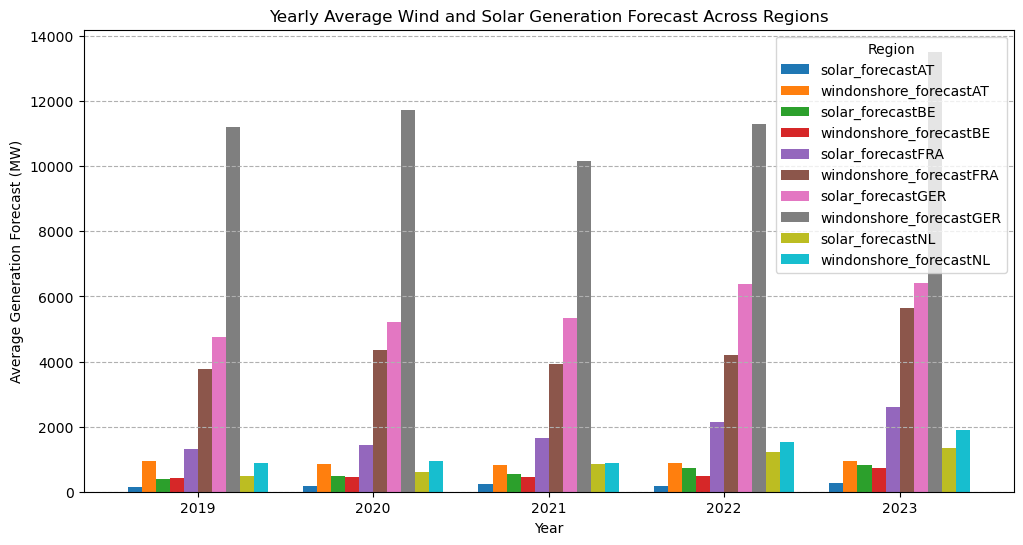

In [ ]:
# Wind and Solar Forecast Comparison: Create side-by-side or stacked bar charts comparing the monthly or yearly average forecasts for wind and solar generation in each region. This visualization helps compare the relative contributions of wind and solar to the renewable energy portfolio.
res_gen['year'] = res_gen['date'].dt.year
yearly_avg_generation = res_gen.groupby('year')[['solar_forecastAT', 'windonshore_forecastAT',
                                                'solar_forecastBE', 'windonshore_forecastBE',
                                                'solar_forecastFRA', 'windonshore_forecastFRA',
                                                'solar_forecastGER', 'windonshore_forecastGER',
                                                'solar_forecastNL', 'windonshore_forecastNL']].mean()

yearly_avg_generation.plot(kind='bar', figsize=(12, 6), width=0.8)
plt.title('Yearly Average Wind and Solar Generation Forecast Across Regions')
plt.xlabel('Year')
plt.ylabel('Average Generation Forecast (MW)')
plt.legend(title='Region')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')

plt.show()



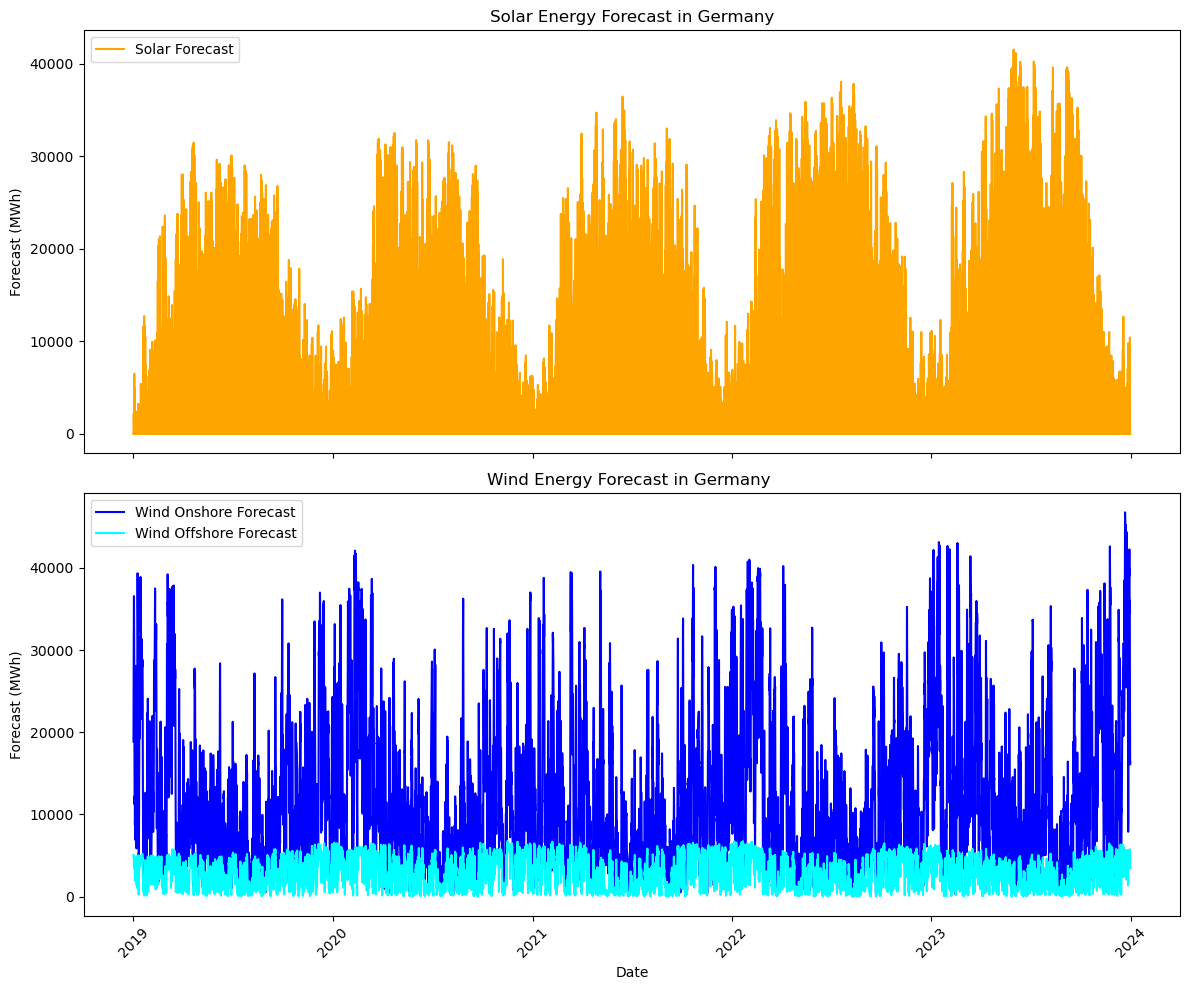

In [ ]:
# To manage the large dataset, let's focus on one month of data for visualization
data_subset = res_gen[(res_gen['date'] >= '2019-01-01') & (res_gen['date'] < '2023-12-31')]

# Time series plot for solar and wind energy forecasts in Germany as an example
fig, ax = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Solar forecast for Germany
ax[0].plot(data_subset['date'], data_subset['solar_forecastGER'], label='Solar Forecast', color='orange')
ax[0].set_title('Solar Energy Forecast in Germany')
ax[0].set_ylabel('Forecast (MWh)')
ax[0].legend()

# Wind forecast for Germany (combining onshore and offshore)
ax[1].plot(data_subset['date'], data_subset['windonshore_forecastGER'], label='Wind Onshore Forecast', color='blue')
ax[1].plot(data_subset['date'], data_subset['windoffshore_forecastGER'], label='Wind Offshore Forecast', color='cyan')
ax[1].set_title('Wind Energy Forecast in Germany ')
ax[1].set_ylabel('Forecast (MWh)')
ax[1].set_xlabel('Date')
ax[1].legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


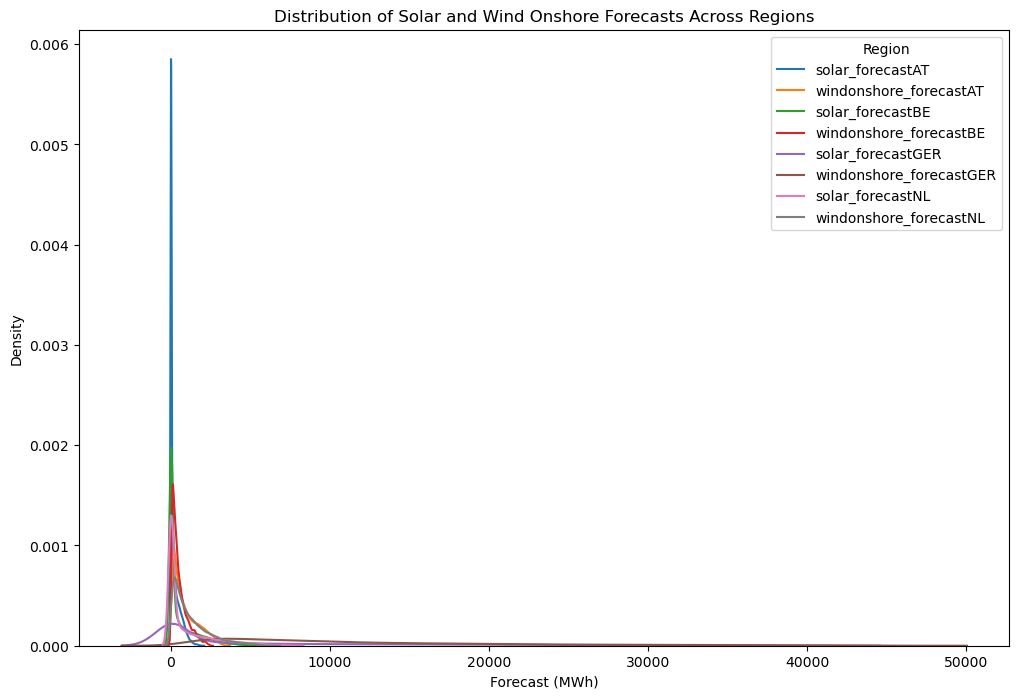

In [ ]:
# Distribution plots to understand the variability in renewable generation forecasts across different regions.


plt.figure(figsize=(12, 8))

for column in ['solar_forecastAT', 'windonshore_forecastAT', 'solar_forecastBE', 'windonshore_forecastBE',
                'solar_forecastGER', 'windonshore_forecastGER', 'solar_forecastNL', 'windonshore_forecastNL']:
     sns.kdeplot(data_subset[column], label=column)

plt.title('Distribution of Solar and Wind Onshore Forecasts Across Regions')
plt.xlabel('Forecast (MWh)')
plt.ylabel('Density')
plt.legend(title='Region')

plt.show()


<Figure size 1200x800 with 0 Axes>

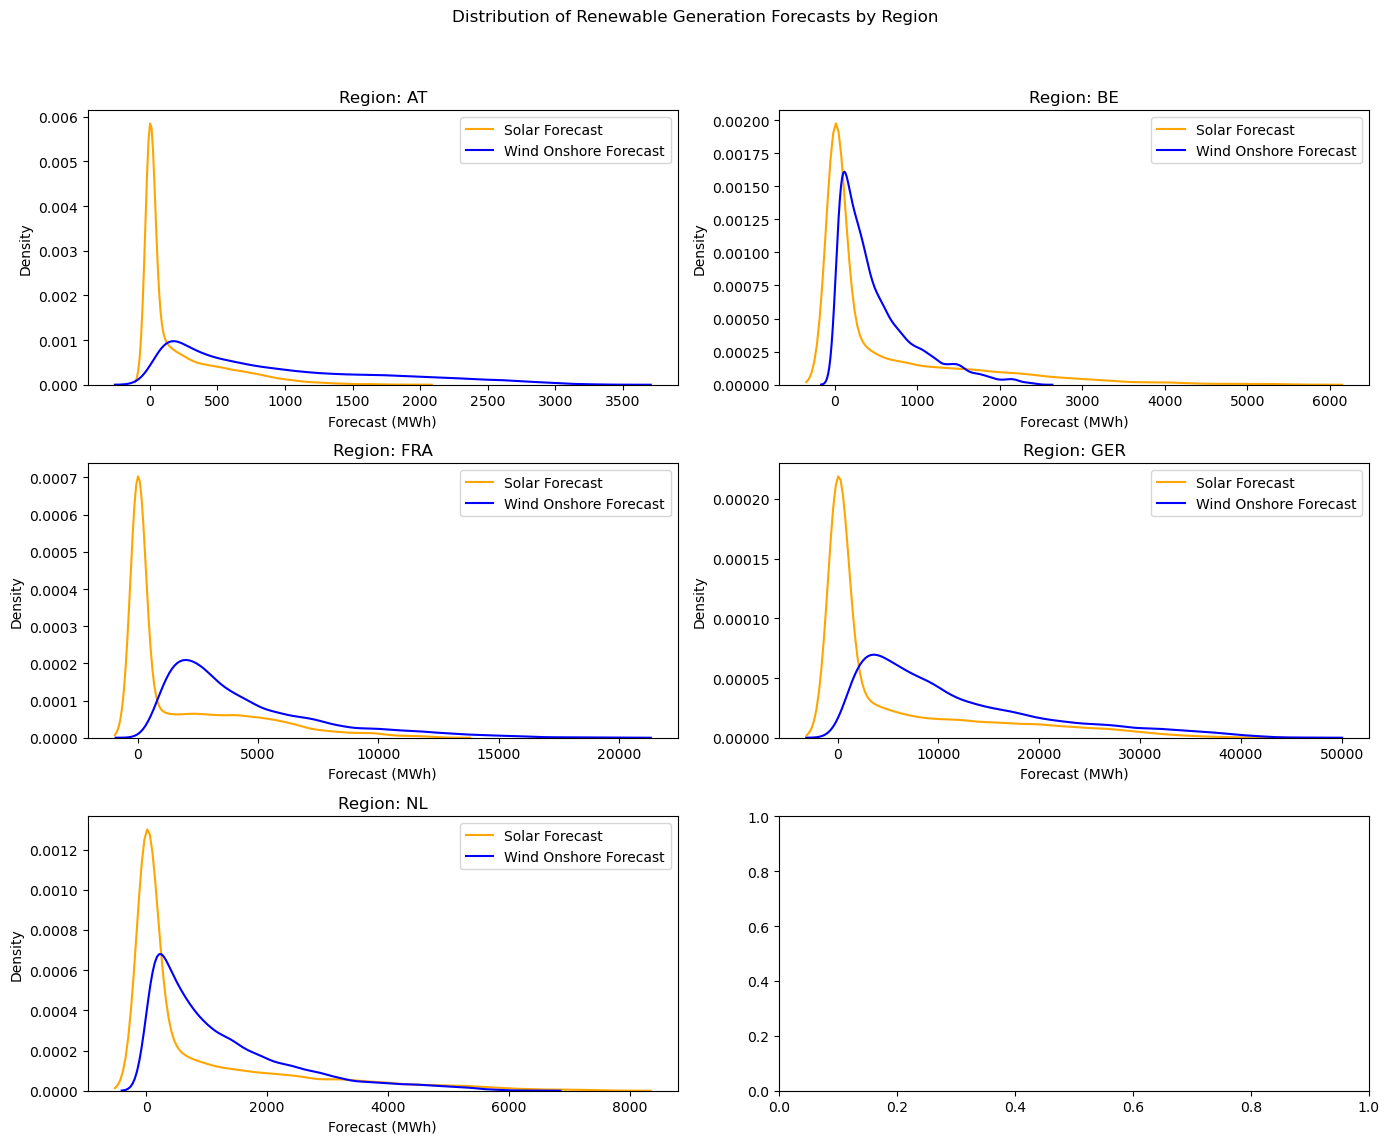

In [ ]:
plt.figure(figsize=(12, 8))

fig, axes = plt.subplots(3, 2, figsize=(14, 12))  # Change from 2x2 to 3x2
fig.suptitle('Distribution of Renewable Generation Forecasts by Region')

axes = axes.flatten()

for i, region in enumerate(['AT', 'BE', 'FRA', 'GER', 'NL']):

    sns.kdeplot(data_subset[f'solar_forecast{region}'], ax=axes[i], color='orange', label='Solar Forecast')
    sns.kdeplot(data_subset[f'windonshore_forecast{region}'], ax=axes[i], color='blue', label='Wind Onshore Forecast')

    axes[i].set_title(f'Region: {region}')
    axes[i].set_xlabel('Forecast (MWh)')
    axes[i].set_ylabel('Density')
    axes[i].legend()  # Add this line to each subplot

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()


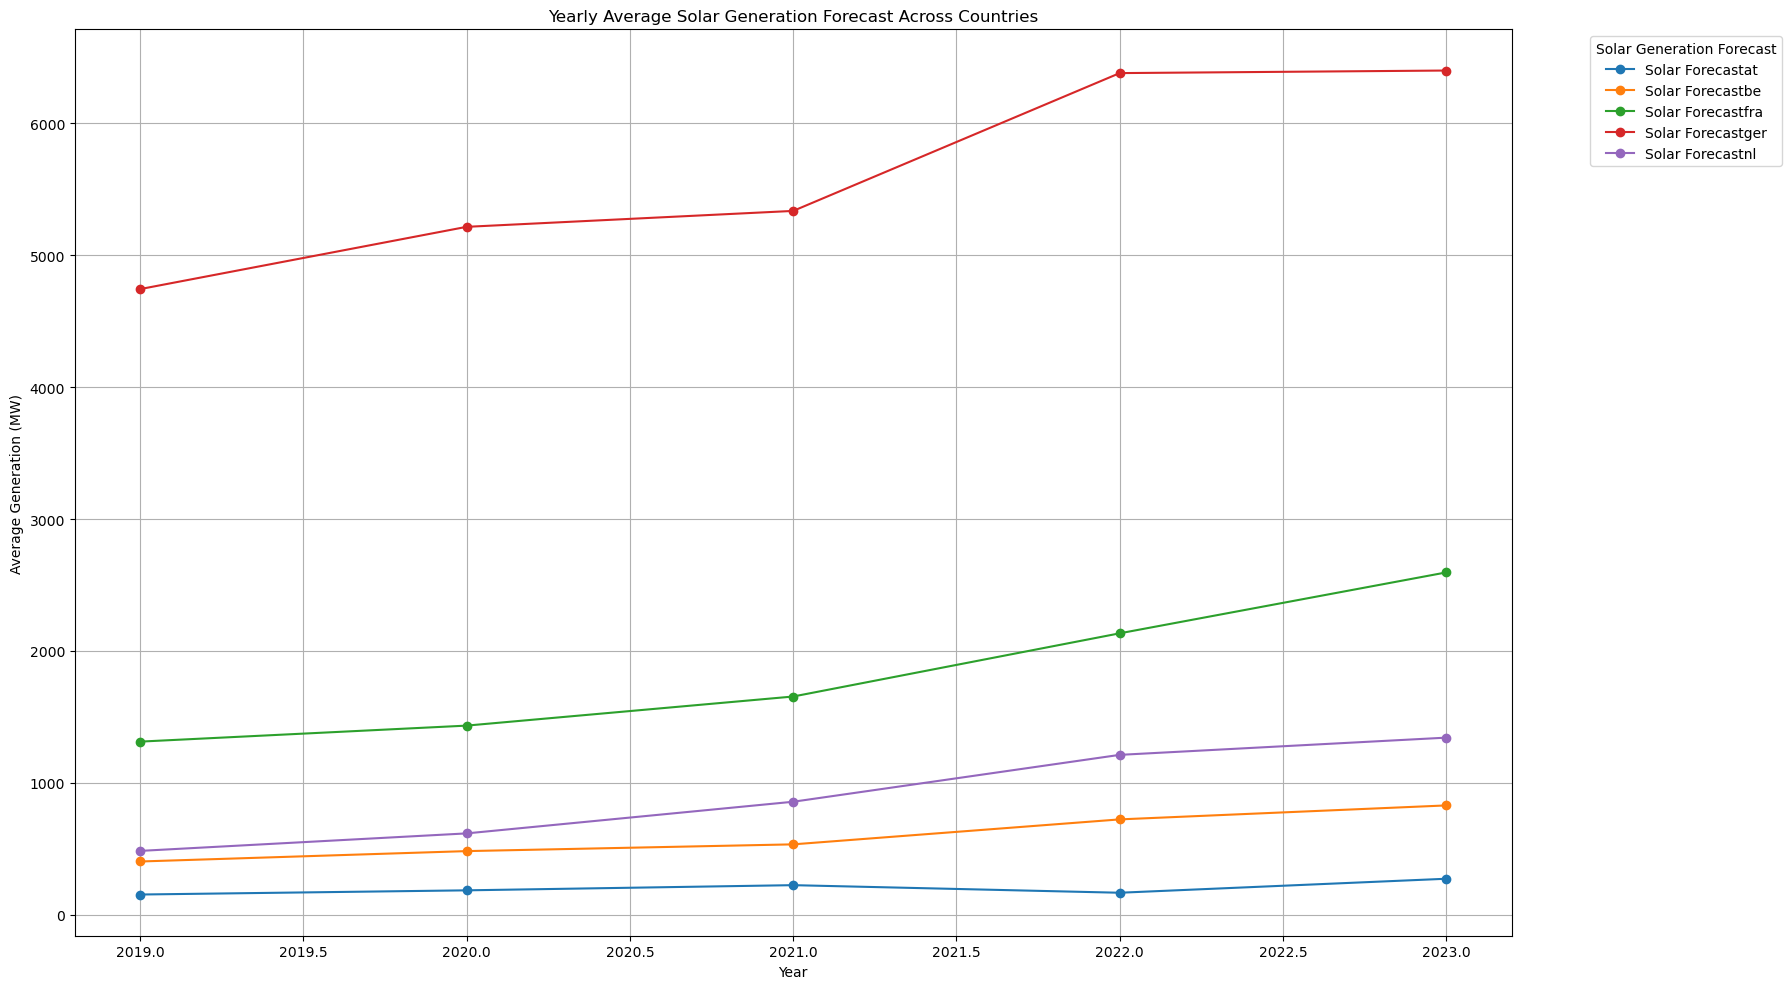

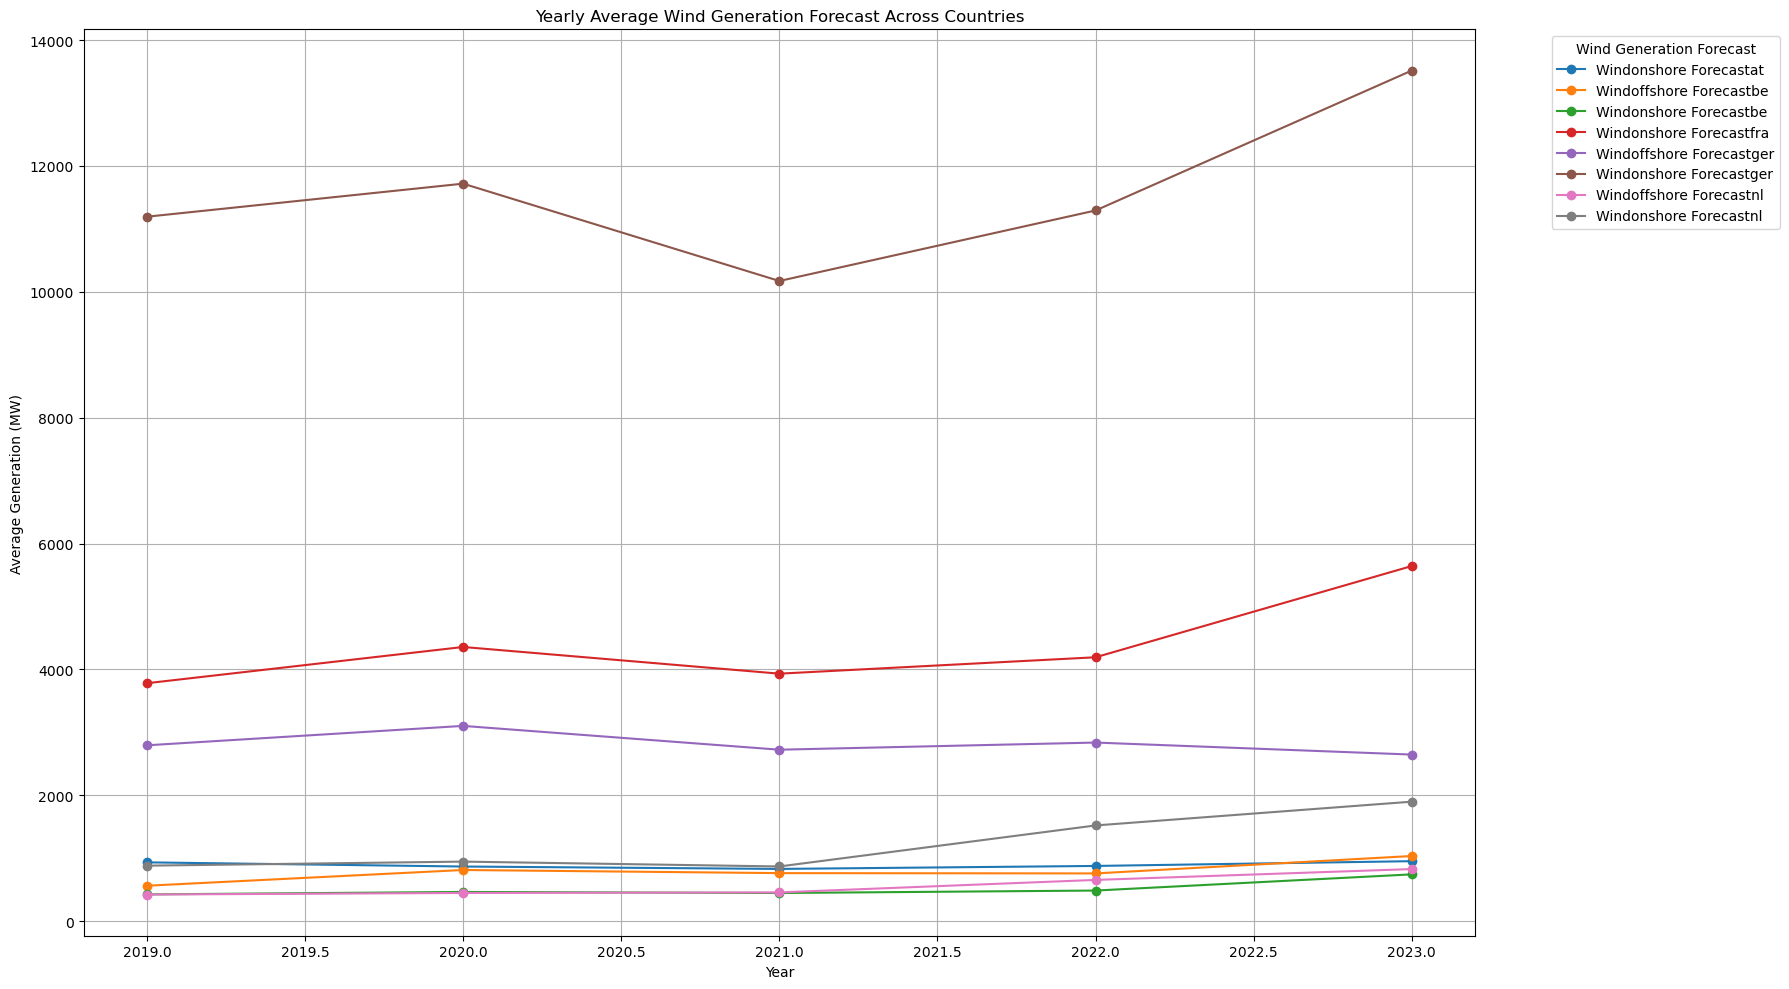

In [ ]:
# Extracting the year from the date for grouping
res_gen['year'] = res_gen['date'].dt.year

# Grouping data by year and calculating the average forecast for solar and wind generation
yearly_avg_res_gen = res_gen.groupby('year').mean()

# Dropping any non-numeric columns (like 'year' if it was included as a separate column)
yearly_avg_res_gen = yearly_avg_res_gen.select_dtypes(include=['float64', 'int'])

# Plotting the yearly average forecast for solar generation across countries
plt.figure(figsize=(18, 10))
for column in yearly_avg_res_gen.columns:
    if 'solar' in column:
        plt.plot(yearly_avg_res_gen.index, yearly_avg_res_gen[column], marker='o', label=column.replace('_', ' ').title())

plt.title('Yearly Average Solar Generation Forecast Across Countries')
plt.xlabel('Year')
plt.ylabel('Average Generation (MW)')
plt.legend(title='Solar Generation Forecast', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Plotting the yearly average forecast for wind generation across countries
plt.figure(figsize=(18, 10))
for column in yearly_avg_res_gen.columns:
    if 'wind' in column:
        plt.plot(yearly_avg_res_gen.index, yearly_avg_res_gen[column], marker='o', label=column.replace('_', ' ').title())

plt.title('Yearly Average Wind Generation Forecast Across Countries')
plt.xlabel('Year')
plt.ylabel('Average Generation (MW)')
plt.legend(title='Wind Generation Forecast', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()




C:\Users\volco\AppData\Local\Temp\ipykernel_8412\768138833.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  res_gen_selected_year['month'] = res_gen_selected_year['date'].dt.month


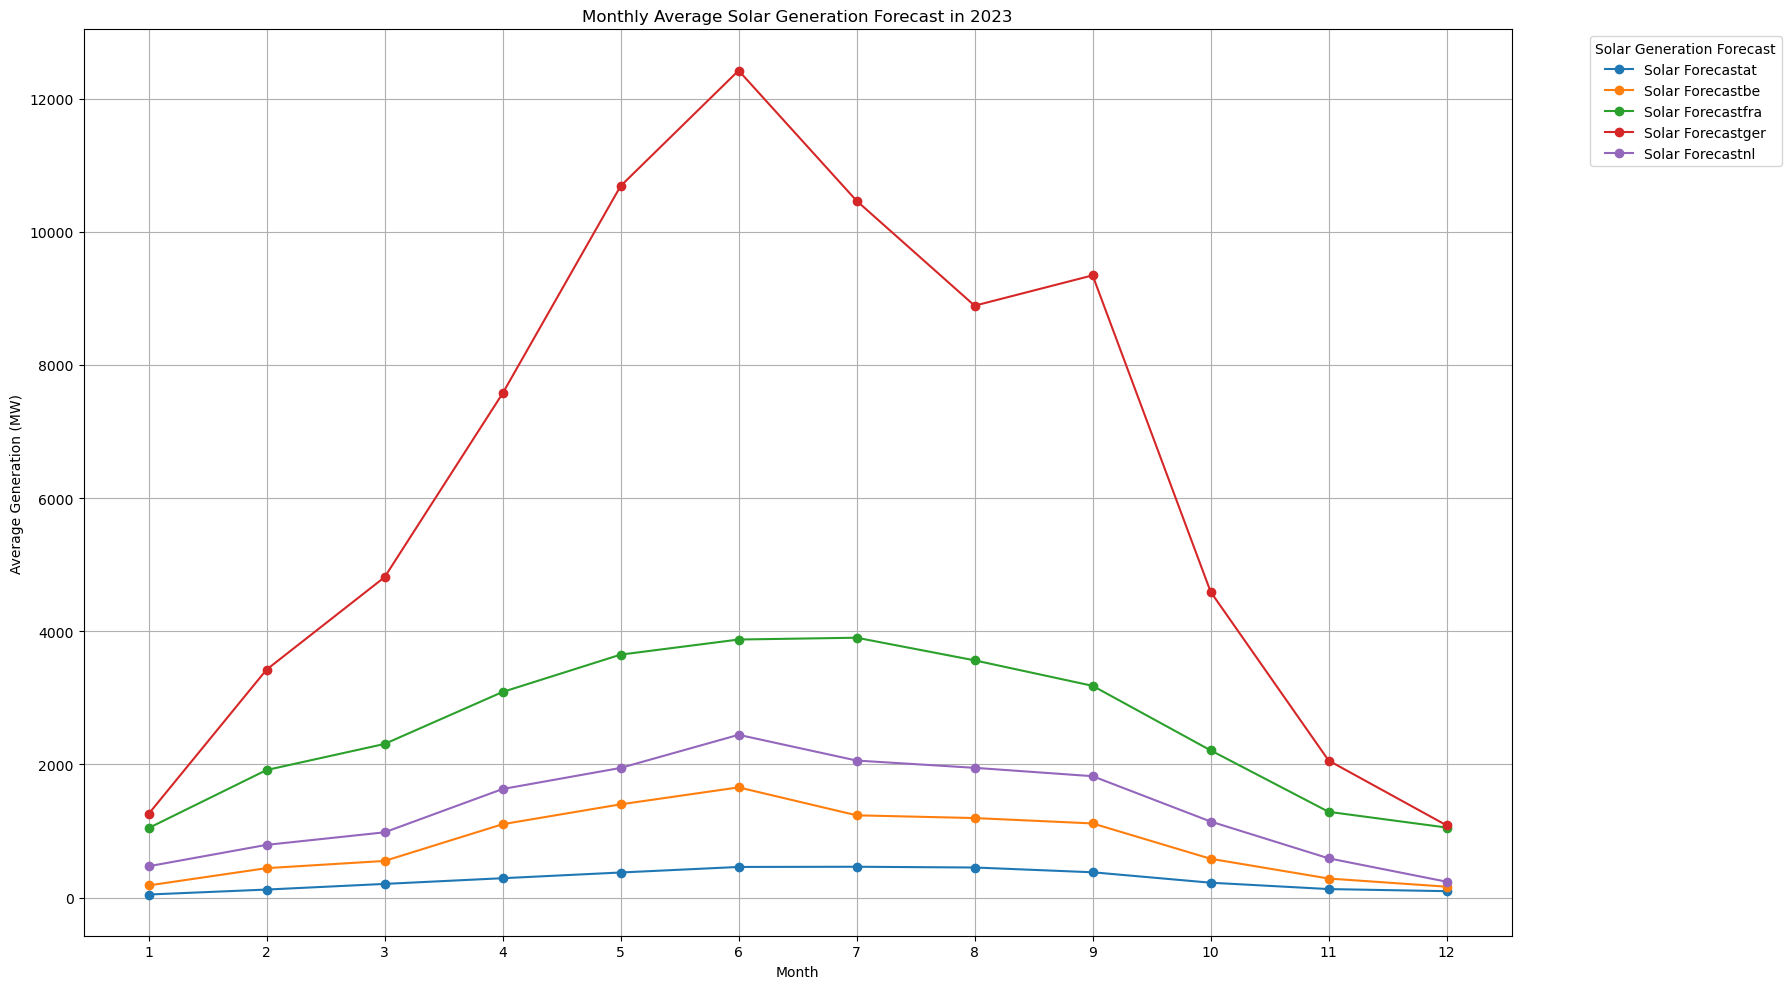

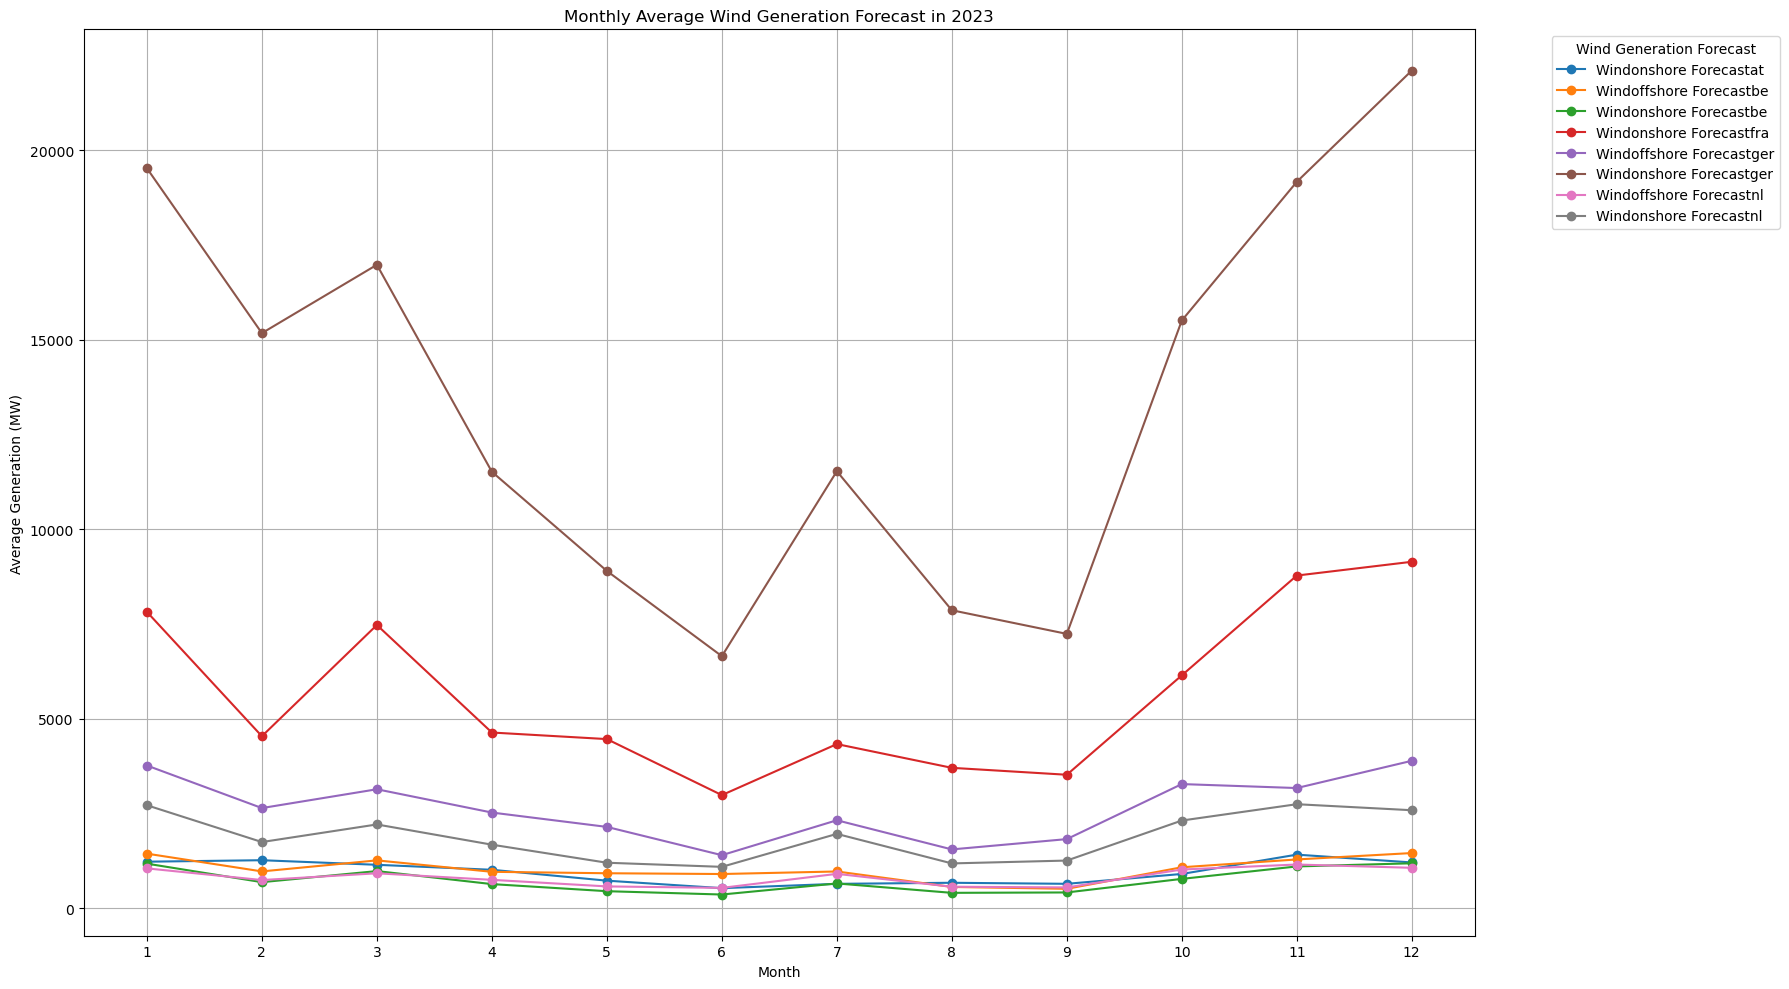

In [ ]:
# Selecting a year for detailed analysis. For demonstration, we'll choose the most recent complete year available in the dataset.
selected_year = res_gen['year'].max()

# Filtering the dataset for the selected year
res_gen_selected_year = res_gen[res_gen['year'] == selected_year]

# Extracting the month from the date for monthly analysis
res_gen_selected_year['month'] = res_gen_selected_year['date'].dt.month

# Grouping data by month and calculating the average forecast for solar and wind generation
monthly_avg_res_gen = res_gen_selected_year.groupby('month').mean()

# Plotting the monthly average forecast for solar generation across countries in the selected year
plt.figure(figsize=(18, 10))
for column in monthly_avg_res_gen.columns:
    if 'solar' in column:
        plt.plot(monthly_avg_res_gen.index, monthly_avg_res_gen[column], marker='o', label=column.replace('_', ' ').title())

plt.title(f'Monthly Average Solar Generation Forecast in {selected_year}')
plt.xlabel('Month')
plt.ylabel('Average Generation (MW)')
plt.xticks(monthly_avg_res_gen.index)
plt.legend(title='Solar Generation Forecast', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

# Plotting the monthly average forecast for wind generation across countries in the selected year
plt.figure(figsize=(18, 10))
for column in monthly_avg_res_gen.columns:
    if 'wind' in column:
        plt.plot(monthly_avg_res_gen.index, monthly_avg_res_gen[column], marker='o', label=column.replace('_', ' ').title())

plt.title(f'Monthly Average Wind Generation Forecast in {selected_year}')
plt.xlabel('Month')
plt.ylabel('Average Generation (MW)')
plt.xticks(monthly_avg_res_gen.index)
plt.legend(title='Wind Generation Forecast', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


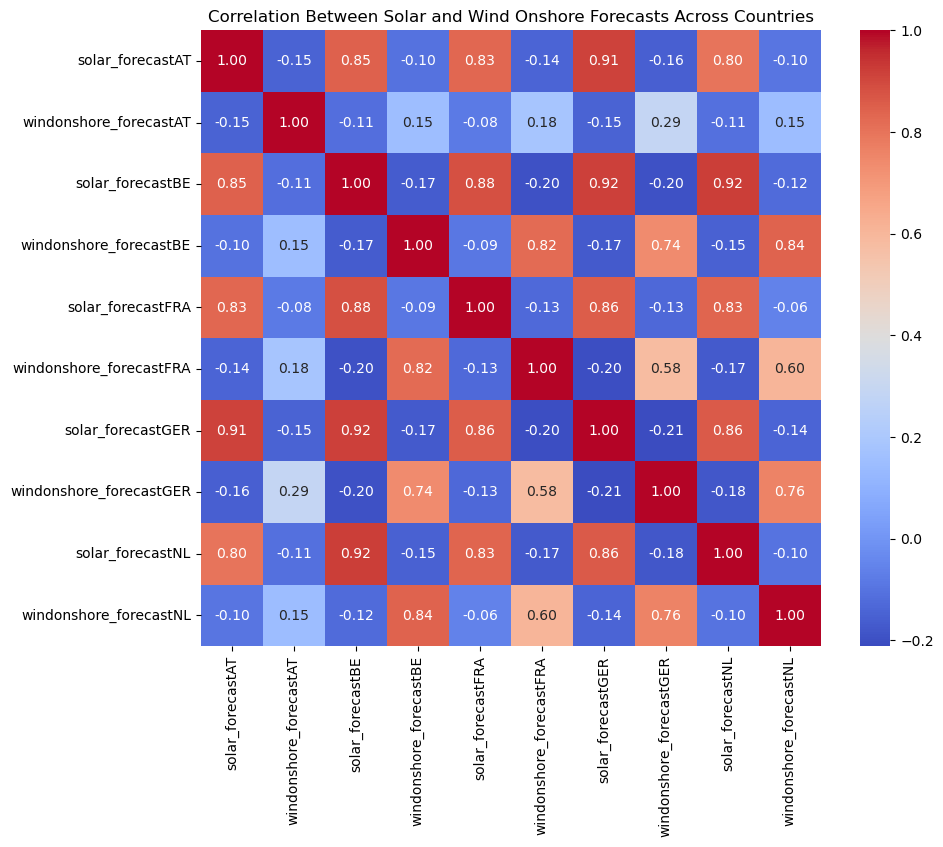

In [ ]:
# Correlation Heatmap Between Solar and Wind Onshore Forecasts Across Countries
res_gen_corr = res_gen[['solar_forecastAT', 'windonshore_forecastAT', 'solar_forecastBE', 'windonshore_forecastBE',
                        'solar_forecastFRA', 'windonshore_forecastFRA', 'solar_forecastGER', 'windonshore_forecastGER',
                        'solar_forecastNL', 'windonshore_forecastNL']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(res_gen_corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Between Solar and Wind Onshore Forecasts Across Countries')
plt.show()



## RESIDUAL_GENERATION

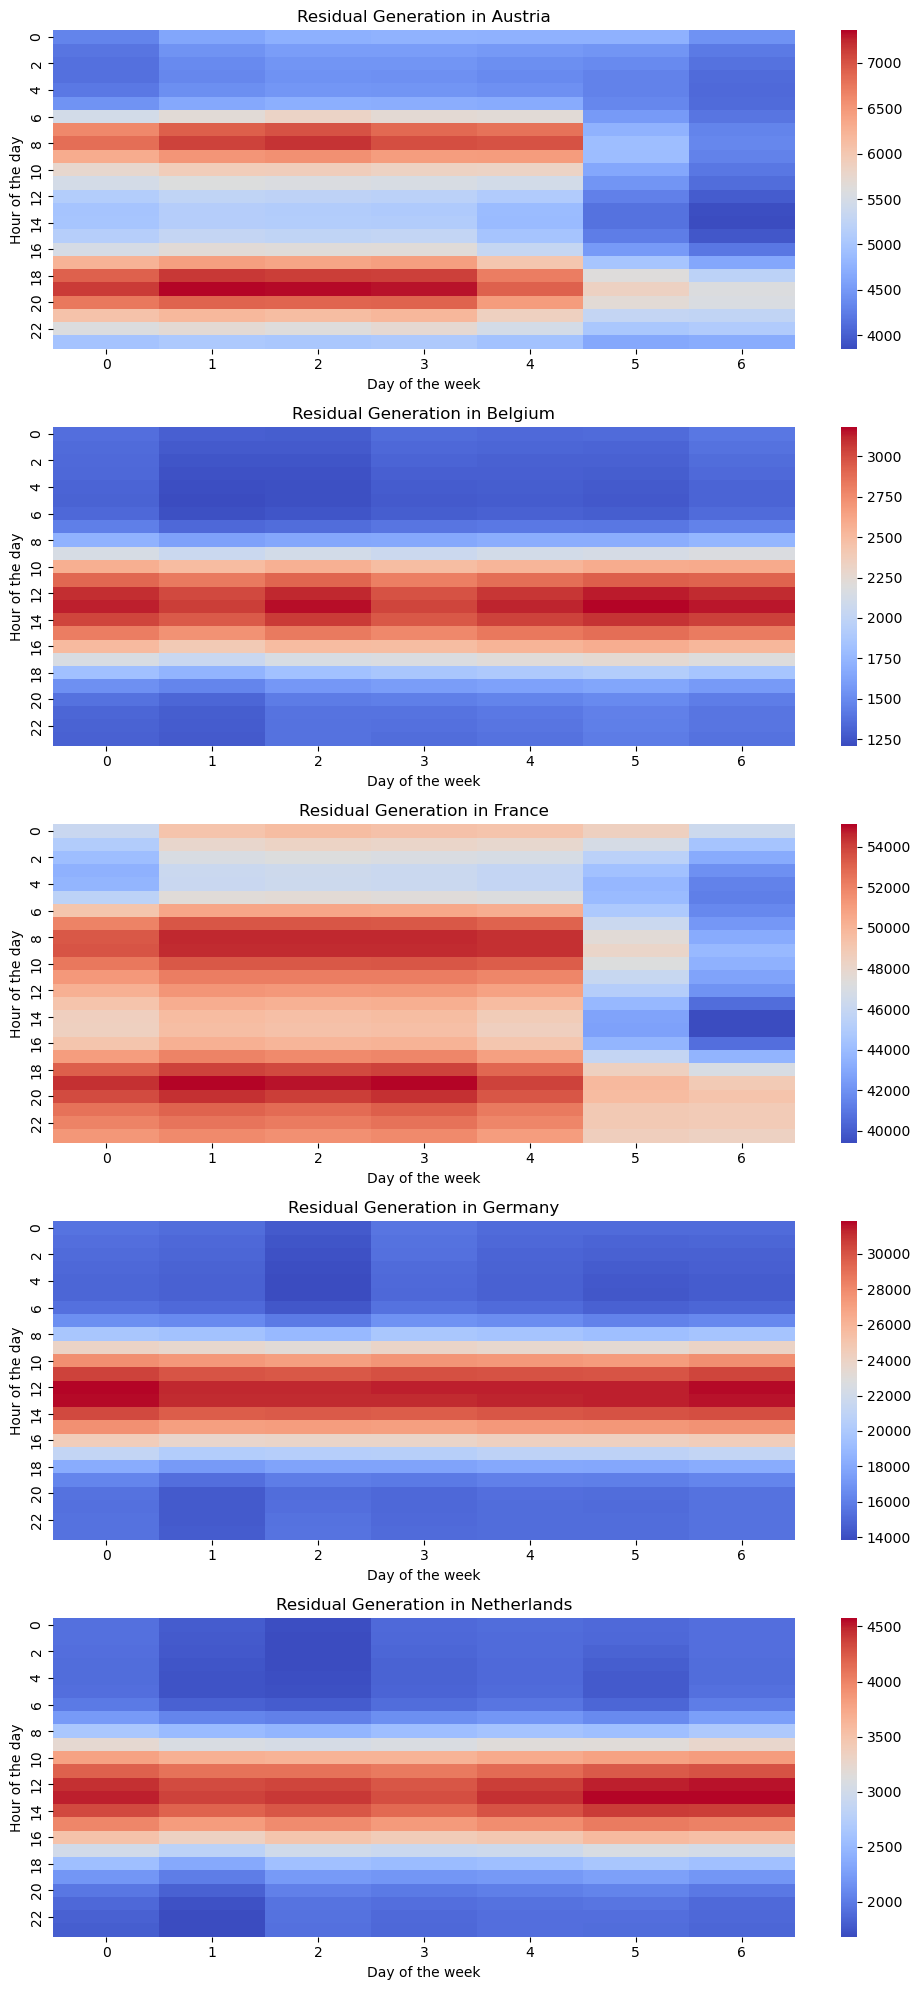

In [ ]:
# Heatmap of Hourly Residual Generation

residual_gen['hour'] = residual_gen['date'].dt.hour
residual_gen['day'] = residual_gen['date'].dt.dayofweek
residual_gen['month'] = residual_gen['date'].dt.month
residual_gen['year'] = residual_gen['date'].dt.year

residual_gen_pivot1 = residual_gen.pivot_table(index='hour', columns='day', values='residual_generationAT', aggfunc='mean')
residual_gen_pivot2 = residual_gen.pivot_table(index='hour', columns='day', values='residual_generationBE', aggfunc='mean')
residual_gen_pivot3 = residual_gen.pivot_table(index='hour', columns='day', values='residual_generationFRA', aggfunc='mean')
residual_gen_pivot4 = residual_gen.pivot_table(index='hour', columns='day', values='residual_generationGER', aggfunc='mean')
residual_gen_pivot5 = residual_gen.pivot_table(index='hour', columns='day', values='residual_generationNL', aggfunc='mean')

fig, ax = plt.subplots(5, 1, figsize=(10, 20))

sns.heatmap(residual_gen_pivot1, ax=ax[0], cmap='coolwarm')
ax[0].set_title('Residual Generation in Austria')
ax[0].set_xlabel('Day of the week')
ax[0].set_ylabel('Hour of the day')

sns.heatmap(residual_gen_pivot2, ax=ax[1], cmap='coolwarm')
ax[1].set_title('Residual Generation in Belgium')
ax[1].set_xlabel('Day of the week')
ax[1].set_ylabel('Hour of the day')

sns.heatmap(residual_gen_pivot3, ax=ax[2], cmap='coolwarm')
ax[2].set_title('Residual Generation in France')
ax[2].set_xlabel('Day of the week')
ax[2].set_ylabel('Hour of the day')

sns.heatmap(residual_gen_pivot4, ax=ax[3], cmap='coolwarm')
ax[3].set_title('Residual Generation in Germany')
ax[3].set_xlabel('Day of the week')
ax[3].set_ylabel('Hour of the day')

sns.heatmap(residual_gen_pivot5, ax=ax[4], cmap='coolwarm')
ax[4].set_title('Residual Generation in Netherlands')
ax[4].set_xlabel('Day of the week')
ax[4].set_ylabel('Hour of the day')

plt.tight_layout()
plt.show()


C:\Users\volco\AppData\Local\Temp\ipykernel_10352\876806080.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_subset = residual_gen[(res_gen['date'] >= '2019-01-01') & (res_gen['date'] < '2023-12-31')]


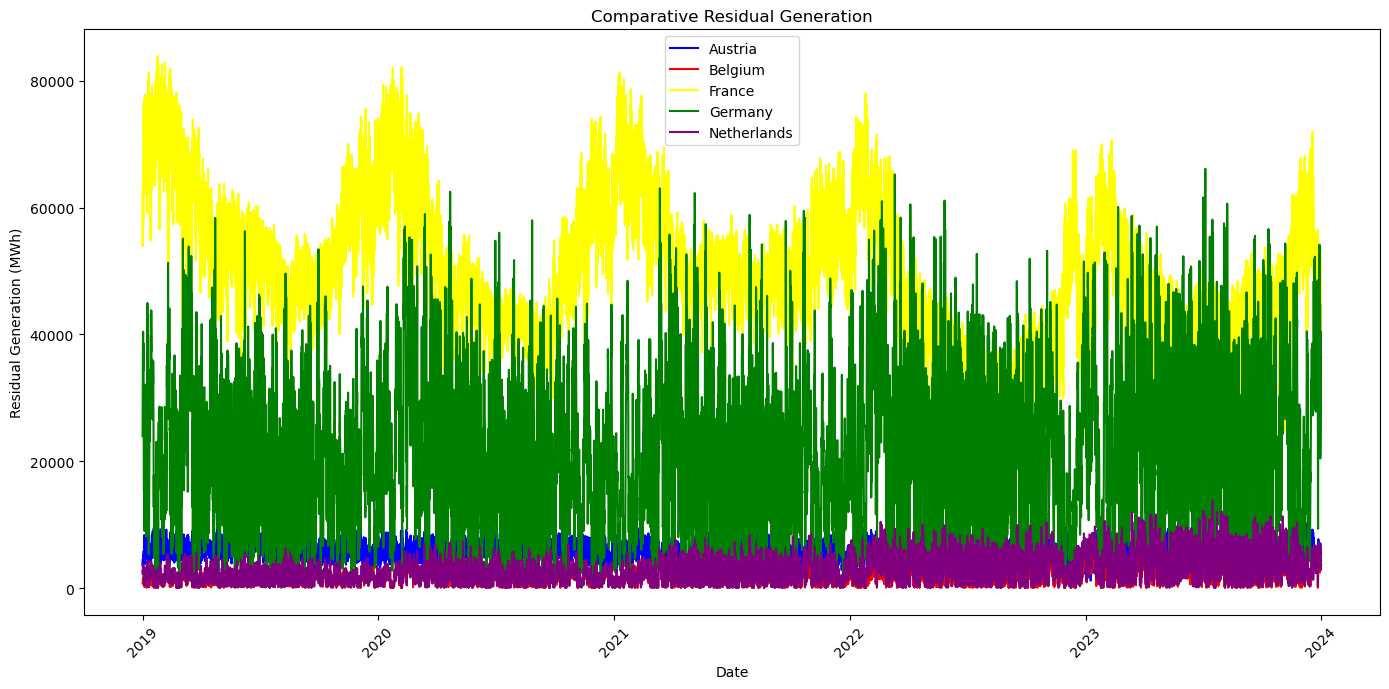

In [ ]:
data_subset = residual_gen[(res_gen['date'] >= '2019-01-01') & (res_gen['date'] < '2023-12-31')]

# Comparative plot for residual generation among all countries (January 2019)
plt.figure(figsize=(14, 7))

# Plotting residual generation for each country
plt.plot(data_subset['date'], data_subset['residual_generationAT'], label='Austria', color='blue')
plt.plot(data_subset['date'], data_subset['residual_generationBE'], label='Belgium', color='red')
plt.plot(data_subset['date'], data_subset['residual_generationFRA'], label='France', color='yellow')
plt.plot(data_subset['date'], data_subset['residual_generationGER'], label='Germany', color='green')
plt.plot(data_subset['date'], data_subset['residual_generationNL'], label='Netherlands', color='purple')

plt.title('Comparative Residual Generation')
plt.ylabel('Residual Generation (MWh)')
plt.xlabel('Date')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


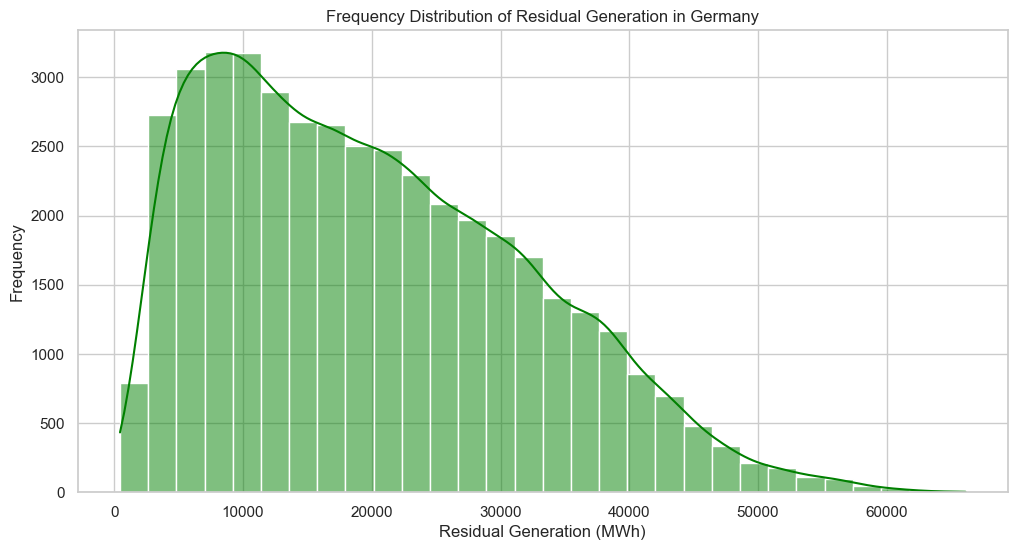

In [ ]:
# Set plotting style
sns.set(style="whitegrid")

# Histograms for Frequency Distribution of Residual Generation in Germany
plt.figure(figsize=(12, 6))
sns.histplot(data_subset['residual_generationGER'], bins=30, kde=True, color='green')
plt.title('Frequency Distribution of Residual Generation in Germany')
plt.xlabel('Residual Generation (MWh)')
plt.ylabel('Frequency')
plt.show()



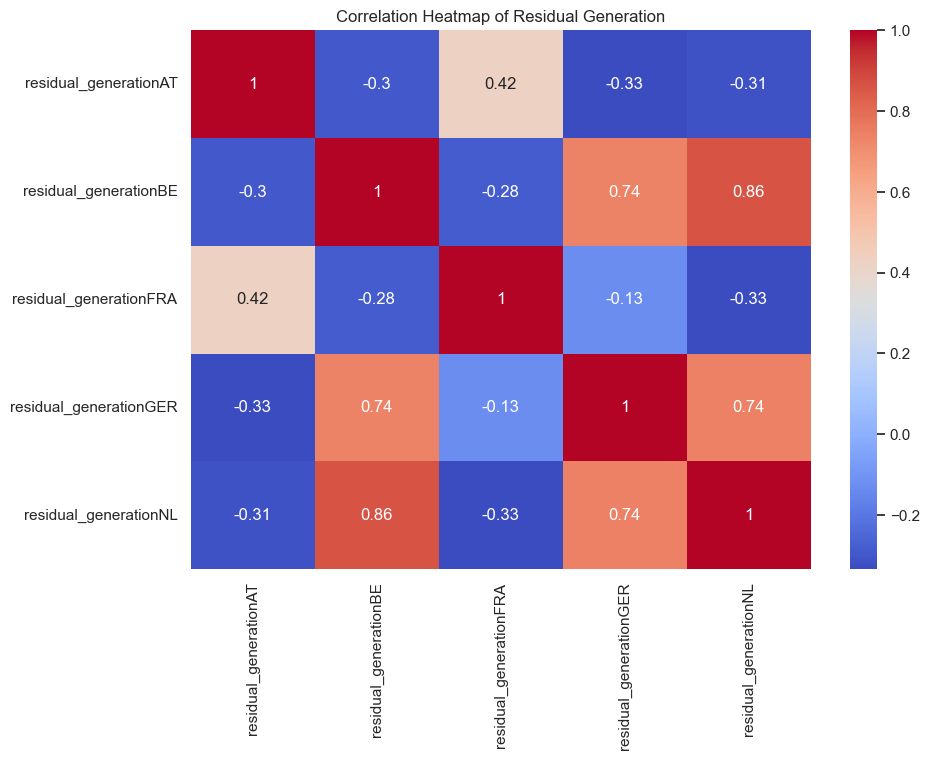

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10, 7))
corr = data_subset[['residual_generationAT', 'residual_generationBE', 'residual_generationFRA', 'residual_generationGER', 'residual_generationNL']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Residual Generation')
plt.show()



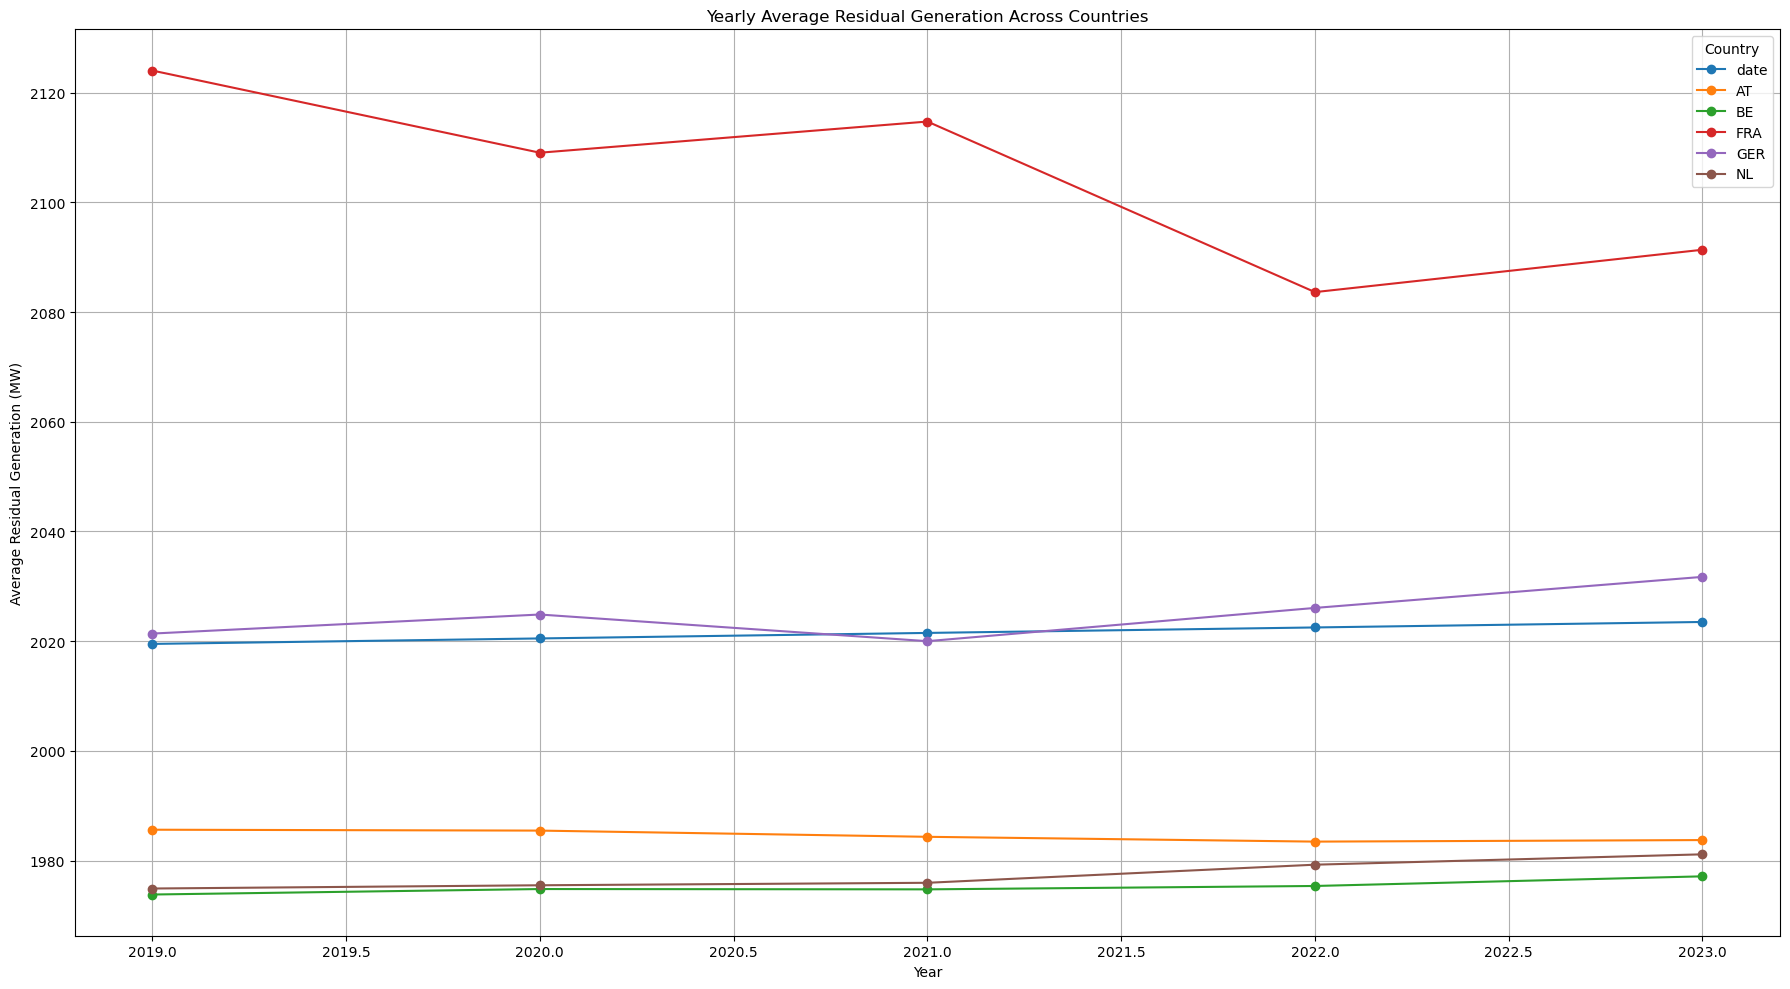

In [ ]:
# Extracting the year and month from the date for grouping and further analysis
residual_gen['year'] = residual_gen['date'].dt.year
residual_gen['month'] = residual_gen['date'].dt.month

# Grouping data by year and calculating the average residual generation for each country
yearly_avg_residual_gen = residual_gen.groupby('year').mean()

# Plotting the yearly average residual generation across countries
plt.figure(figsize=(18, 10))
for column in yearly_avg_residual_gen.columns:
    if column not in ['month']:
        plt.plot(yearly_avg_residual_gen.index, yearly_avg_residual_gen[column], marker='o', label=column.replace('residual_generation', ''))

plt.title('Yearly Average Residual Generation Across Countries')
plt.xlabel('Year')
plt.ylabel('Average Residual Generation (MW)')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


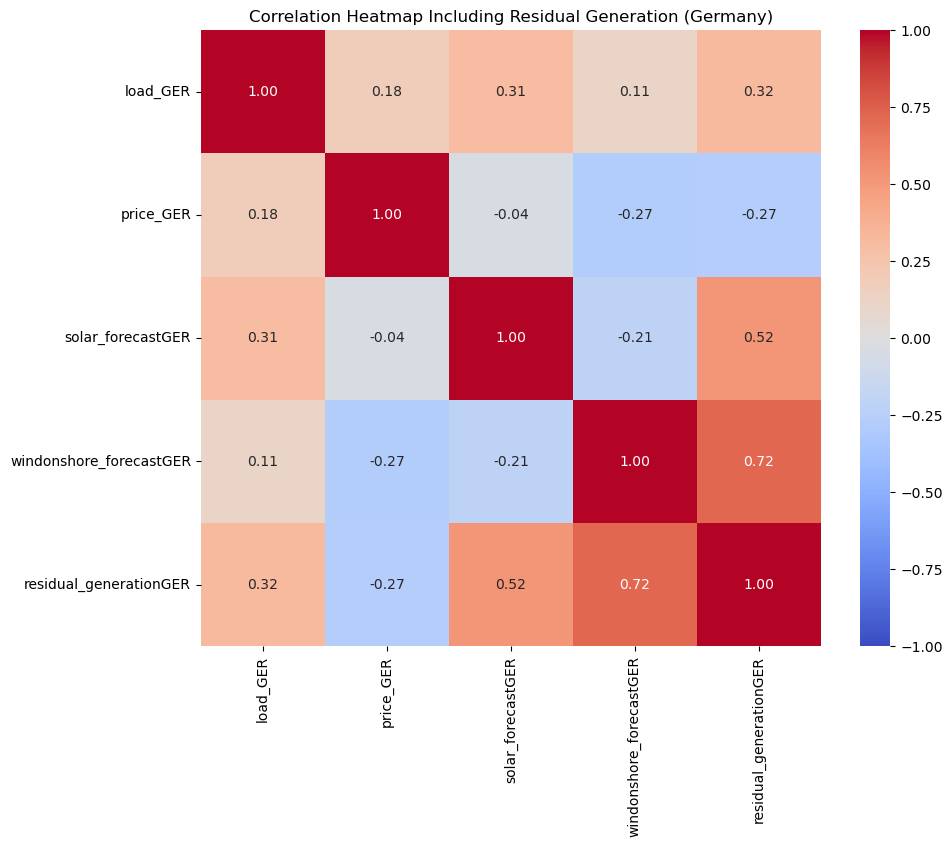

In [ ]:
comprehensive_data = pd.merge(merged_data, residual_gen.drop(columns=['year', 'month']), on='date', how='inner')

# Selecting a subset of variables for correlation analysis
variables_of_interest = ['load_GER', 'price_GER', 'solar_forecastGER', 'windonshore_forecastGER', 'residual_generationGER']
subset_data = comprehensive_data[variables_of_interest]

# Calculating the correlation matrix for the selected subset
correlation_matrix_subset = subset_data.corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap Including Residual Generation (Germany)')
plt.show()

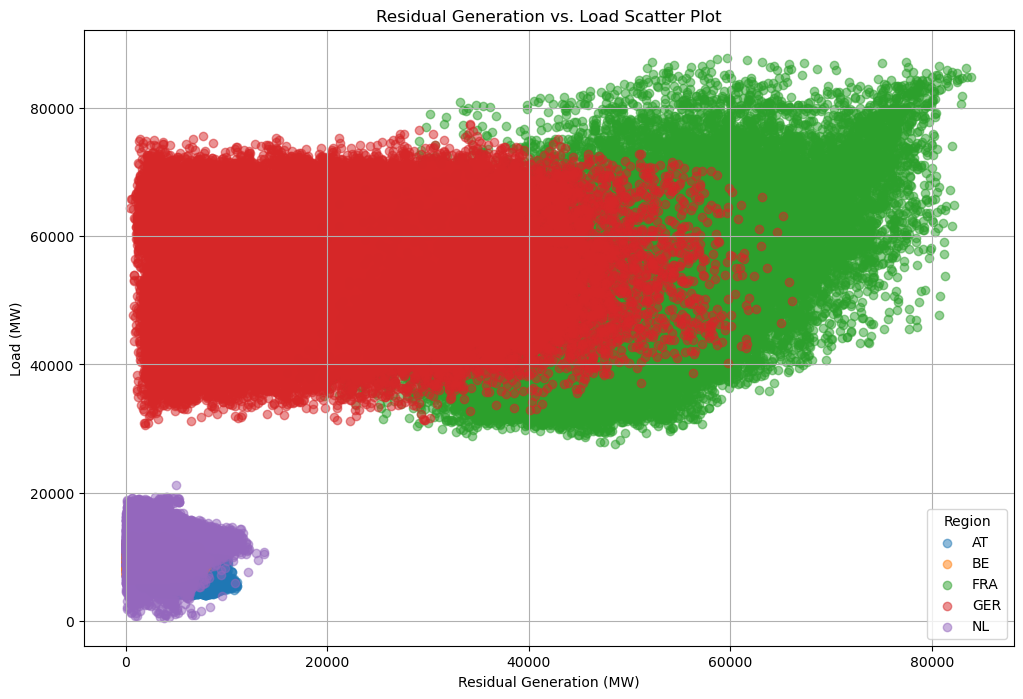

In [ ]:
plt.figure(figsize=(12, 8))
for region in ['AT', 'BE', 'FRA', 'GER', 'NL']:
    plt.scatter(residual_gen[f'residual_generation{region}'], load[f'load_{region}'][1:42961], alpha=0.5, label=region)

plt.title('Residual Generation vs. Load Scatter Plot')
plt.xlabel('Residual Generation (MW)')
plt.ylabel('Load (MW)')
plt.legend(title='Region')
plt.grid(True)

plt.show()


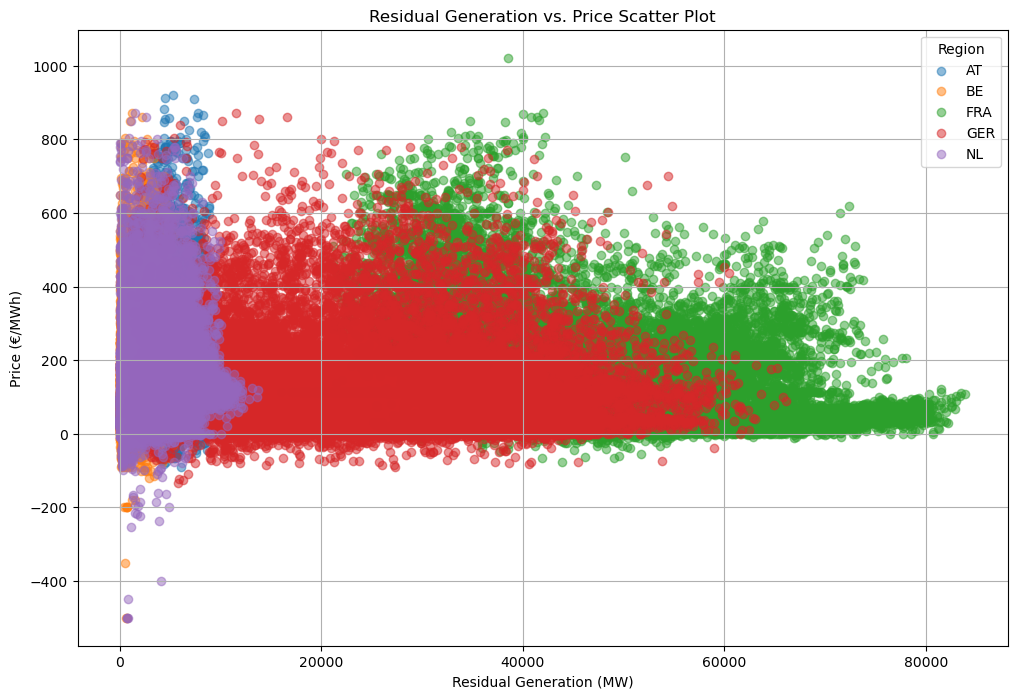

In [ ]:
plt.figure(figsize=(12, 8))
for region in ['AT', 'BE', 'FRA', 'GER', 'NL']:
    plt.scatter(residual_gen[f'residual_generation{region}'], prices[f'price_{region}'][1:42961], alpha=0.5, label=region)

plt.title('Residual Generation vs. Price Scatter Plot')
plt.xlabel('Residual Generation (MW)')
plt.ylabel('Price (€/MWh)')
plt.legend(title='Region')
plt.grid(True)

plt.show()

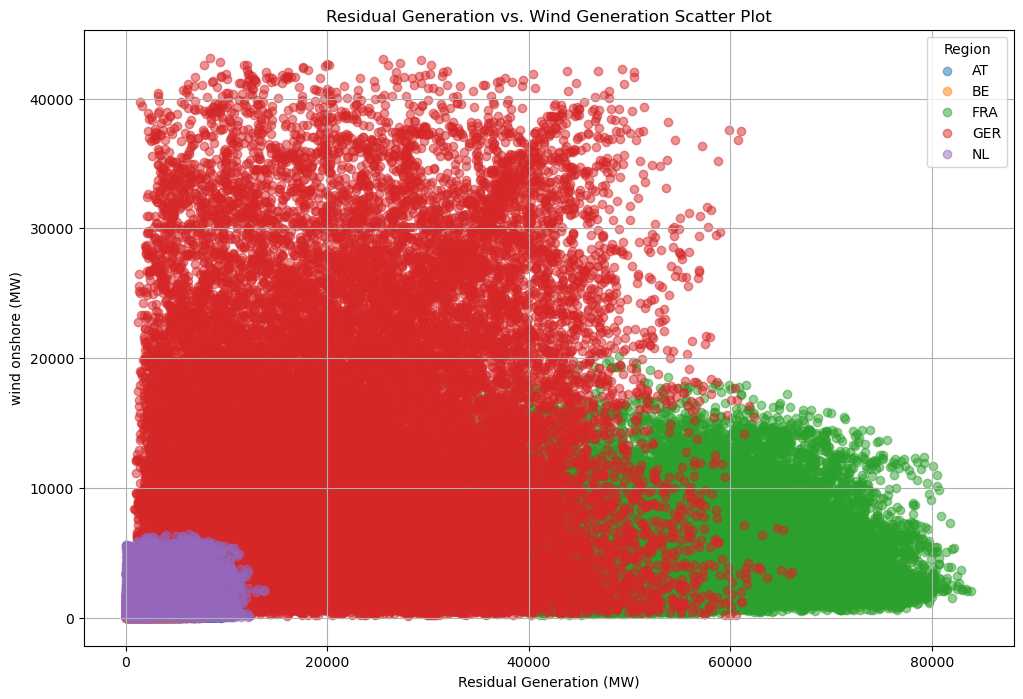

In [ ]:
# Residual Generation vs. Wind and Solar Generation: Create a scatter plot comparing the residual generation to the wind and solar generation for each region. This visualization helps understand the relationship between renewable generation and load consumption.

plt.figure(figsize=(12, 8))
for region in ['AT', 'BE', 'FRA', 'GER', 'NL']:
    plt.scatter(residual_gen[f'residual_generation{region}'], res_gen[f'windonshore_forecast{region}'][1:42961], alpha=0.5, label=region)

plt.title('Residual Generation vs. Wind Generation Scatter Plot')
plt.xlabel('Residual Generation (MW)')
plt.ylabel('wind onshore (MW)')
plt.legend(title='Region')

plt.grid(True)

plt.show()

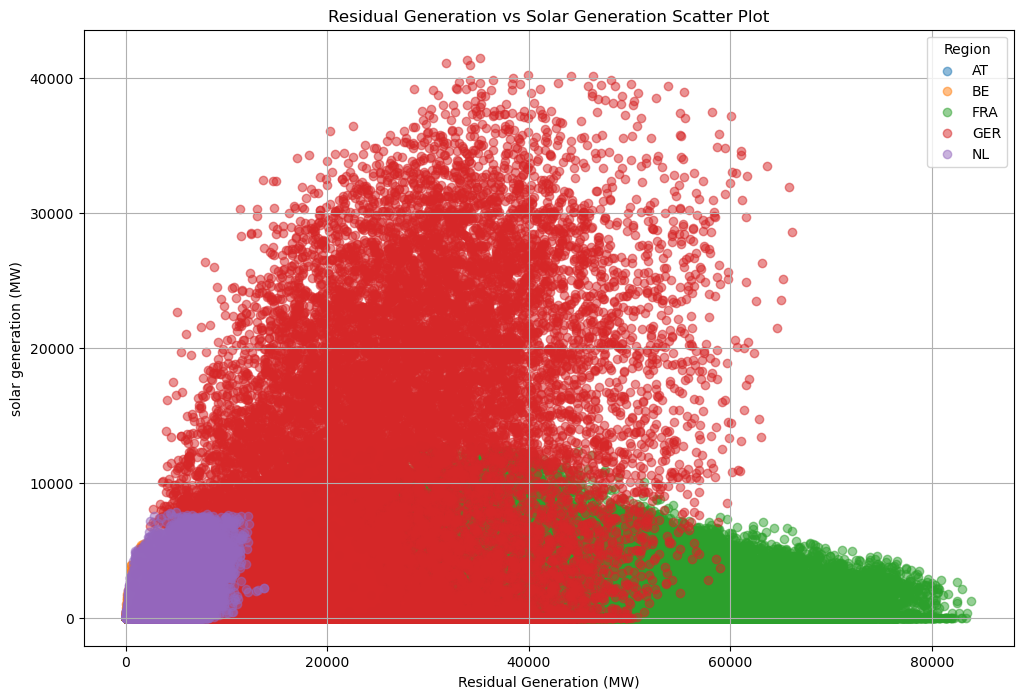

In [ ]:
plt.figure(figsize=(12, 8))
for region in ['AT', 'BE', 'FRA', 'GER', 'NL']:
    plt.scatter(residual_gen[f'residual_generation{region}'], res_gen[f'solar_forecast{region}'][1:42961], alpha=0.5, label=region)

plt.title('Residual Generation vs Solar Generation Scatter Plot')
plt.xlabel('Residual Generation (MW)')
plt.ylabel('solar generation (MW)')
plt.legend(title='Region')

plt.grid(True)

plt.show()